Certainly! Let's break down the key points and analyses from the 311 Complaints Project in New York:

1. **Data Cleaning and Preprocessing:**
   - The 'landmark' column was found to contain only null values and was dropped as it had no data.
   - Columns with more than 50% missing data were dropped.
   - Records with missing values in essential columns like 'closed_date', 'location_type', 'incident_zip', 'city', 'latitude', and 'longitude' were removed.

2. **Data Processing:**
   - Created new columns for various time-related features (e.g., month, year, day, hour, minute) based on the 'created_date' and 'closed_date'.
   - Calculated the request closing time in seconds, minutes, and hours for each complaint.

3. **Data Visualization:**
   - Identified Brooklyn City as having the highest number of complaints, followed by New York City.
   - Used a scatter plot and a hexbin plot to visualize complaint concentrations across Brooklyn.
   - Determined major types of complaints and their counts, highlighting 'HEAT/HOT WATER', 'Illegal Parking', and 'Noise-Residential' as the top complaints.
   - Plotted the hourly distribution of total complaints activity to understand the pattern of complaints throughout the day.

4. **Top Complaint Type Analysis:**
   - Identified 'HEAT/HOT WATER' as the major complaint type, comprising 37% of all complaints.
   - Recommended that the Department of Housing Preservation and Development of New York City should address 'HEAT/HOT WATER' complaints first.

5. **Complaint Distribution Analysis:**
   - Noted that Brooklyn and Bronx were the most affected boroughs, with 'HEAT/HOT WATER' being the top complaint in both.

6. **Zip Code Analysis:**
   - Identified zip codes 10467 and 11226 as having the highest number of complaints filed.
   - Used a map to visualize the distribution of complaints across different zip codes.

7. **Population and Income Analysis:**
   - Retrieved external datasets for median household income and population for each zip code in New York City in 2022 to correlate with the complaint data.

8. **Outlier Detection and Removal:**
   - Provided code for basic outlier detection and removal based on the IQR method.

9. **Feature Engineering:**
   - Demonstrated how to convert categorical features into a one-hot encoded representation using a BinaryEncoder.

10. **Modeling:**
    - Used Random Forest Regression for modeling and demonstrated hyperparameter tuning using GridSearchCV.
    - Calculated feature importances to understand the most influential features in the model's predictions.

the analysis provides insights into the types, distribution, and patterns of complaints in New York City, which can be valuable for decision-making and resource allocation by relevant departments and authorities.

# 1) Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
sns.set(style ='whitegrid')
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from plotly.graph_objs import Bar
from matplotlib import patches
import plotly.graph_objs as go

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.ensemble import RandomForestRegressor
#import pycaret
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 2) Understand the dataset:
       - Identify the shape of the dataset 
       - Identify variables with null values

In [2]:
df = pd.read_csv ('nyc_311_data_2022 (2).csv')   
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,landmark,status,bbl,borough,latitude,longitude
0,56415040,2022-12-31T23:59:25.000,2023-01-01T00:24:01.000,NYPD,New York City Police Department,Illegal Fireworks,NaN,Street/Sidewalk,11218.0,BROOKLYN,OCEAN PARKWAY,Closed,3.053750e+09,BROOKLYN,40.638927,-73.973250
1,56418476,2022-12-31T23:59:13.000,2023-01-01T00:26:51.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033.0,NEW YORK,WEST 184 STREET,Closed,1.021650e+09,MANHATTAN,40.851187,-73.932670
2,56415364,2022-12-31T23:59:12.000,2023-01-01T01:00:18.000,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11226.0,BROOKLYN,OCEAN AVENUE,Closed,3.051230e+09,BROOKLYN,40.645124,-73.960077
3,56414786,2022-12-31T23:59:04.000,2023-01-03T07:49:56.000,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,3+ Family Apt. Building,10035.0,NEW YORK,2 AVENUE,Closed,1.017970e+09,MANHATTAN,40.801435,-73.934432
4,56414075,2022-12-31T23:58:52.000,2023-01-01T00:29:43.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11385.0,RIDGEWOOD,CORNELIA STREET,Closed,4.035470e+09,QUEENS,40.699215,-73.906590


In [3]:
# printing the column names, non-null counts, and data types of our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   unique_key      300000 non-null  int64  
 1   created_date    300000 non-null  object 
 2   closed_date     293796 non-null  object 
 3   agency          300000 non-null  object 
 4   agency_name     300000 non-null  object 
 5   complaint_type  300000 non-null  object 
 6   descriptor      294238 non-null  object 
 7   location_type   262220 non-null  object 
 8   incident_zip    296554 non-null  float64
 9   city            288244 non-null  object 
 10  landmark        142571 non-null  object 
 11  status          300000 non-null  object 
 12  bbl             268508 non-null  float64
 13  borough         300000 non-null  object 
 14  latitude        295918 non-null  float64
 15  longitude       295918 non-null  float64
dtypes: float64(4), int64(1), object(11)
memory usage: 36.6+ 

###### For landmark, all values were casted as null by pandas. Examining the query confirms these were all null string values. We can drop this column later, as it contains no data.

In [4]:
# summary statistics for numeric columns
df.describe()

,unique_key,incident_zip,bbl,latitude,longitude
count,3.000000e+05,296554.00000,2.685080e+05,295918.000000,295918.000000
mean,5.625207e+07,10808.82354,2.701371e+09,40.737524,-73.922691
std,9.412094e+04,622.95774,1.151523e+09,0.087596,0.075921
min,5.608294e+07,2026.00000,0.000000e+00,40.499001,-74.254952
25%,5.617044e+07,10452.00000,2.027480e+09,40.670104,-73.964474
50%,5.625246e+07,11201.00000,3.014960e+09,40.732612,-73.924920
75%,5.633390e+07,11233.00000,4.004320e+09,40.821275,-73.878459
max,5.655642e+07,97208.00000,5.270001e+09,40.912869,-73.701233


In [5]:
# summary statistics for string columns, transpose for readibility
df.describe(include=['O']).T

,count,unique,top,freq
created_date,300000,240614,2022-11-28T12:00:00.000,199
closed_date,293796,188350,2023-06-20T11:56:51.000,1623
agency,300000,15,NYPD,105754
agency_name,300000,14,New York City Police Department,105754
complaint_type,300000,178,HEAT/HOT WATER,59319
descriptor,294238,756,ENTIRE BUILDING,38227
location_type,262220,109,RESIDENTIAL BUILDING,102023
city,288244,81,BROOKLYN,88357
landmark,142571,5507,BROADWAY,1652
status,300000,7,Closed,292310


# 2) Data Cleaning
##### Handling Nulls

In [6]:
def show_detaleis():
    global df
    for col in df.columns:
        print(f'for feature  {col}')
        print(f'number of Nulls  {df[col].isna().sum()}')
        print (f'number of unique values is  {len(df[col].unique())}')
        print(f'unique values is  {df[col].unique()}')
        print('\n\n==================================\n\n')
show_detaleis()

for feature  unique_key
number of Nulls  0
number of unique values is  300000
unique values is  [56415040 56418476 56415364 ... 56084378 56085462 56087518]




for feature  created_date
number of Nulls  0
number of unique values is  240614
unique values is  ['2022-12-31T23:59:25.000' '2022-12-31T23:59:13.000'
 '2022-12-31T23:59:12.000' ... '2022-11-25T22:31:48.000'
 '2022-11-25T22:31:39.000' '2022-11-25T22:31:35.000']




for feature  closed_date
number of Nulls  6204
number of unique values is  188351
unique values is  ['2023-01-01T00:24:01.000' '2023-01-01T00:26:51.000'
 '2023-01-01T01:00:18.000' ... '2022-11-25T23:14:52.000'
 '2022-11-25T22:50:45.000' '2022-11-26T01:02:33.000']




for feature  agency
number of Nulls  0
number of unique values is  15
unique values is  ['NYPD' 'DOHMH' 'HPD' 'DEP' 'DOT' 'DCA' 'DHS' 'DSNY' 'DOB' 'DPR' 'TLC'
 'EDC' 'NYC311-PRD' 'OTI' 'DOE']




for feature  agency_name
number of Nulls  0
number of unique values is  14
unique values is  ['New York City P

number of Nulls  157429
number of unique values is  5508
unique values is  ['OCEAN PARKWAY' 'WEST  184 STREET' 'OCEAN AVENUE' ... 'HOLLY STREET'
 'HICKORY CIRCLE' 'CLOVERDALE LANE']




for feature  status
number of Nulls  0
number of unique values is  7
unique values is  ['Closed' 'In Progress' 'Assigned' 'Open' 'Started' 'Unspecified'
 'Pending']




for feature  bbl
number of Nulls  31492
number of unique values is  89074
unique values is  [3.05375005e+09 1.02165006e+09 3.05123004e+09 ... 4.01460006e+09
 3.04660004e+09 3.07834001e+09]




for feature  borough
number of Nulls  0
number of unique values is  6
unique values is  ['BROOKLYN' 'MANHATTAN' 'QUEENS' 'BRONX' 'STATEN ISLAND' 'Unspecified']




for feature  latitude
number of Nulls  4082
number of unique values is  113044
unique values is  [40.63892746 40.851187   40.64512412 ... 40.75184362 40.65454429
 40.62381693]




for feature  longitude
number of Nulls  4082
number of unique values is  113043
unique values is  [-73.97325

In [7]:
#it gives all the columns that contains some null values
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0] 
feature_na

['closed_date',
 'descriptor',
 'location_type',
 'incident_zip',
 'city',
 'landmark',
 'bbl',
 'latitude',
 'longitude']

In [8]:
# this gives you the percentage of missing values
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

closed_date has 2.068 % missing values
descriptor has 1.9207 % missing values
location_type has 12.5933 % missing values
incident_zip has 1.1487 % missing values
city has 3.9187 % missing values
landmark has 52.4763 % missing values
bbl has 10.4973 % missing values
latitude has 1.3607 % missing values
longitude has 1.3607 % missing values


#### A handful of columns have high null value counts. Let's drop columns with missing data > 50%.

In [9]:
# drop columns with missing data > 50%
missing_data = (df.isnull().sum() / df.shape[0]) * 100
criteria = missing_data <= 50

df = df.loc[:, df.columns[criteria]]
print('shape of data: {}'.format(df.shape))
print('% null per column:')

# preview new columns and % null values
(df
 .isnull()
 .sum()
 .div(df.shape[0])
 .mul(100)
 .sort_values(ascending=False)
)

shape of data: (300000, 15)
% null per column:


location_type     12.593333
bbl               10.497333
city               3.918667
closed_date        2.068000
descriptor         1.920667
latitude           1.360667
longitude          1.360667
incident_zip       1.148667
unique_key         0.000000
created_date       0.000000
agency             0.000000
agency_name        0.000000
complaint_type     0.000000
status             0.000000
borough            0.000000
dtype: float64

#### Remove the data records where either the 'closed_date','location_type','incident_zip','city','latitude','longitude' columns have missing values or NaN

In [10]:
#dropping the missing values
df.dropna(axis='index',subset=['closed_date','location_type','incident_zip','city','latitude','longitude'
                              ],inplace=True) 
df.reset_index(inplace = True)
df.drop(['index'],axis=1,inplace=True)

In [11]:
df

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,status,bbl,borough,latitude,longitude
0,56415040,2022-12-31T23:59:25.000,2023-01-01T00:24:01.000,NYPD,New York City Police Department,Illegal Fireworks,NaN,Street/Sidewalk,11218.0,BROOKLYN,Closed,3.053750e+09,BROOKLYN,40.638927,-73.973250
1,56418476,2022-12-31T23:59:13.000,2023-01-01T00:26:51.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033.0,NEW YORK,Closed,1.021650e+09,MANHATTAN,40.851187,-73.932670
2,56415364,2022-12-31T23:59:12.000,2023-01-01T01:00:18.000,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11226.0,BROOKLYN,Closed,3.051230e+09,BROOKLYN,40.645124,-73.960077
3,56414786,2022-12-31T23:59:04.000,2023-01-03T07:49:56.000,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,3+ Family Apt. Building,10035.0,NEW YORK,Closed,1.017970e+09,MANHATTAN,40.801435,-73.934432
4,56414075,2022-12-31T23:58:52.000,2023-01-01T00:29:43.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11385.0,RIDGEWOOD,Closed,4.035470e+09,QUEENS,40.699215,-73.906590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245750,56084639,2022-11-25T22:31:54.000,2022-11-26T00:40:15.000,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11372.0,JACKSON HEIGHTS,Closed,4.014600e+09,QUEENS,40.751844,-73.880891
245751,56087807,2022-11-25T22:31:52.000,2022-11-25T22:55:07.000,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11203.0,BROOKLYN,Closed,3.046600e+09,BROOKLYN,40.654544,-73.926763
245752,56084623,2022-11-25T22:31:48.000,2022-11-25T23:14:52.000,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10463.0,BRONX,Closed,2.059180e+09,BRONX,40.888337,-73.913486
245753,56084378,2022-11-25T22:31:48.000,2022-11-25T22:50:45.000,NYPD,New York City Police Department,Encampment,NaN,Store/Commercial,11354.0,FLUSHING,Closed,4.049800e+09,QUEENS,40.760168,-73.830423


In [12]:
df['lat,long'] = df['latitude'].astype(str) + ',' + df['longitude'].astype(str)
df

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,status,bbl,borough,latitude,longitude,"lat,long"
0,56415040,2022-12-31T23:59:25.000,2023-01-01T00:24:01.000,NYPD,New York City Police Department,Illegal Fireworks,NaN,Street/Sidewalk,11218.0,BROOKLYN,Closed,3.053750e+09,BROOKLYN,40.638927,-73.973250,"40.63892746412587,-73.97325020454049"
1,56418476,2022-12-31T23:59:13.000,2023-01-01T00:26:51.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033.0,NEW YORK,Closed,1.021650e+09,MANHATTAN,40.851187,-73.932670,"40.85118699615938,-73.93266992103403"
2,56415364,2022-12-31T23:59:12.000,2023-01-01T01:00:18.000,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11226.0,BROOKLYN,Closed,3.051230e+09,BROOKLYN,40.645124,-73.960077,"40.64512411588355,-73.96007697831942"
3,56414786,2022-12-31T23:59:04.000,2023-01-03T07:49:56.000,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,3+ Family Apt. Building,10035.0,NEW YORK,Closed,1.017970e+09,MANHATTAN,40.801435,-73.934432,"40.80143454654757,-73.93443230896085"
4,56414075,2022-12-31T23:58:52.000,2023-01-01T00:29:43.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11385.0,RIDGEWOOD,Closed,4.035470e+09,QUEENS,40.699215,-73.906590,"40.699214628010594,-73.90659036915068"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245750,56084639,2022-11-25T22:31:54.000,2022-11-26T00:40:15.000,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11372.0,JACKSON HEIGHTS,Closed,4.014600e+09,QUEENS,40.751844,-73.880891,"40.75184362326569,-73.88089081586148"
245751,56087807,2022-11-25T22:31:52.000,2022-11-25T22:55:07.000,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11203.0,BROOKLYN,Closed,3.046600e+09,BROOKLYN,40.654544,-73.926763,"40.65454429286473,-73.92676321465716"
245752,56084623,2022-11-25T22:31:48.000,2022-11-25T23:14:52.000,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10463.0,BRONX,Closed,2.059180e+09,BRONX,40.888337,-73.913486,"40.88833738566947,-73.91348563954683"
245753,56084378,2022-11-25T22:31:48.000,2022-11-25T22:50:45.000,NYPD,New York City Police Department,Encampment,NaN,Store/Commercial,11354.0,FLUSHING,Closed,4.049800e+09,QUEENS,40.760168,-73.830423,"40.76016833864922,-73.83042294583589"


In [13]:
#Identify Null Values
print('shape of data for referance: {}'.format(df.shape))
print('count nulls per column:')

(df
 .isnull()
 .sum()
 .sort_values(ascending=False)
)

shape of data for referance: (245755, 16)
count nulls per column:


bbl               6052
descriptor        3865
unique_key           0
created_date         0
closed_date          0
agency               0
agency_name          0
complaint_type       0
location_type        0
incident_zip         0
city                 0
status               0
borough              0
latitude             0
longitude            0
lat,long             0
dtype: int64

# 3) Data Processing

In [14]:
# dropping the duplicates value from the dataset 
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

In [15]:
# Convert the data types to correct ones
df['created_date'] = pd.to_datetime(df['created_date'],format = '%Y-%m-%dT%H:%M:%S.%f')
df['closed_date'] = pd.to_datetime(df['closed_date'],format = '%Y-%m-%dT%H:%M:%S.%f')

In [16]:
# Using this copy of dataframe for creating data visualizations on whole data without any data preprocessing
df2 = df.copy()
df2['created_Month'] = df2['created_date'].dt.month
df2['closed_Month'] = df2['closed_date'].dt.month
df2['created_Year'] = df2['created_date'].dt.year
df2['closed_Year'] = df2['closed_date'].dt.year
df2['created_Day'] = df2['created_date'].dt.day
df2['closed_Day'] = df2['closed_date'].dt.day
df2['created_hours'] = df2['created_date'].dt.hour
df2['closed_hours'] = df2['closed_date'].dt.hour
df2['created_minute'] = df2['created_date'].dt.minute
df2['closed_minute'] = df2['closed_date'].dt.minute
#Check the average response time across various types of complaints
df2['Request_Closing_Time'] = df2['closed_date'] - df2['created_date']
df2['Request_Closing_seconds'] = (df2['closed_date'] - df2['created_date']).dt.total_seconds()
df2['Request_Closing_minutes'] = (df2['closed_date'] - df2['created_date'])/ 60
#df2['Request_Closing_hours'] = df2['Request_Closing_Time'].astype('timedelta64[h]')+1    #calculating hours
df2['Request_Closing_hours'] = (df2['closed_date'] - df2['created_date']).dt.total_seconds() / 3600    #calculating hours
df2.drop(['created_date'],axis=1,inplace=True )
df2.drop(['closed_date'],axis=1,inplace=True )

In [17]:

df2[['Request_Closing_Time','Request_Closing_hours','Request_Closing_seconds' ,'Request_Closing_minutes']].head(10)

,Request_Closing_Time,Request_Closing_hours,Request_Closing_seconds,Request_Closing_minutes
0,0 days 00:24:36,0.410000,1476.0,0 days 00:00:24.600000
1,0 days 00:27:38,0.460556,1658.0,0 days 00:00:27.633333333
2,0 days 01:01:06,1.018333,3666.0,0 days 00:01:01.100000
3,2 days 07:50:52,55.847778,201052.0,0 days 00:55:50.866666666
4,0 days 00:30:51,0.514167,1851.0,0 days 00:00:30.850000
5,0 days 00:17:43,0.295278,1063.0,0 days 00:00:17.716666666
6,0 days 01:10:41,1.178056,4241.0,0 days 00:01:10.683333333
7,0 days 00:49:49,0.830278,2989.0,0 days 00:00:49.816666666
8,0 days 06:17:49,6.296944,22669.0,0 days 00:06:17.816666666
9,66 days 12:50:22,1596.839444,5748622.0,1 days 02:36:50.366666666


#### We can see here that all tickets are closed, but it seems that dealing with seconds is more precise than dealing with hours and minutes

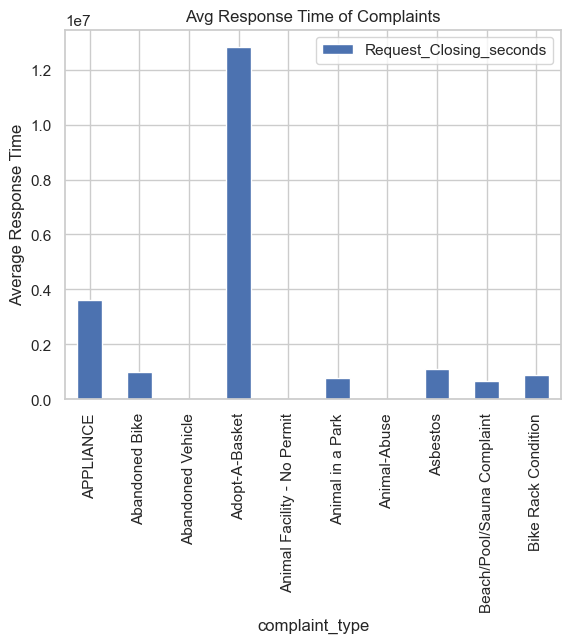

In [18]:
Resolution = df2.groupby(['complaint_type'])[['Request_Closing_seconds']].mean()

Resolution.head(10).plot(kind='bar',title='Avg Response Time of Complaints', xlabel='complaint_type', ylabel='Average Response Time')
plt.show()

In [19]:
df2['borough'].unique()

array(['BROOKLYN', 'MANHATTAN', 'QUEENS', 'BRONX', 'STATEN ISLAND'],
      dtype=object)

# 4)Data Visualization

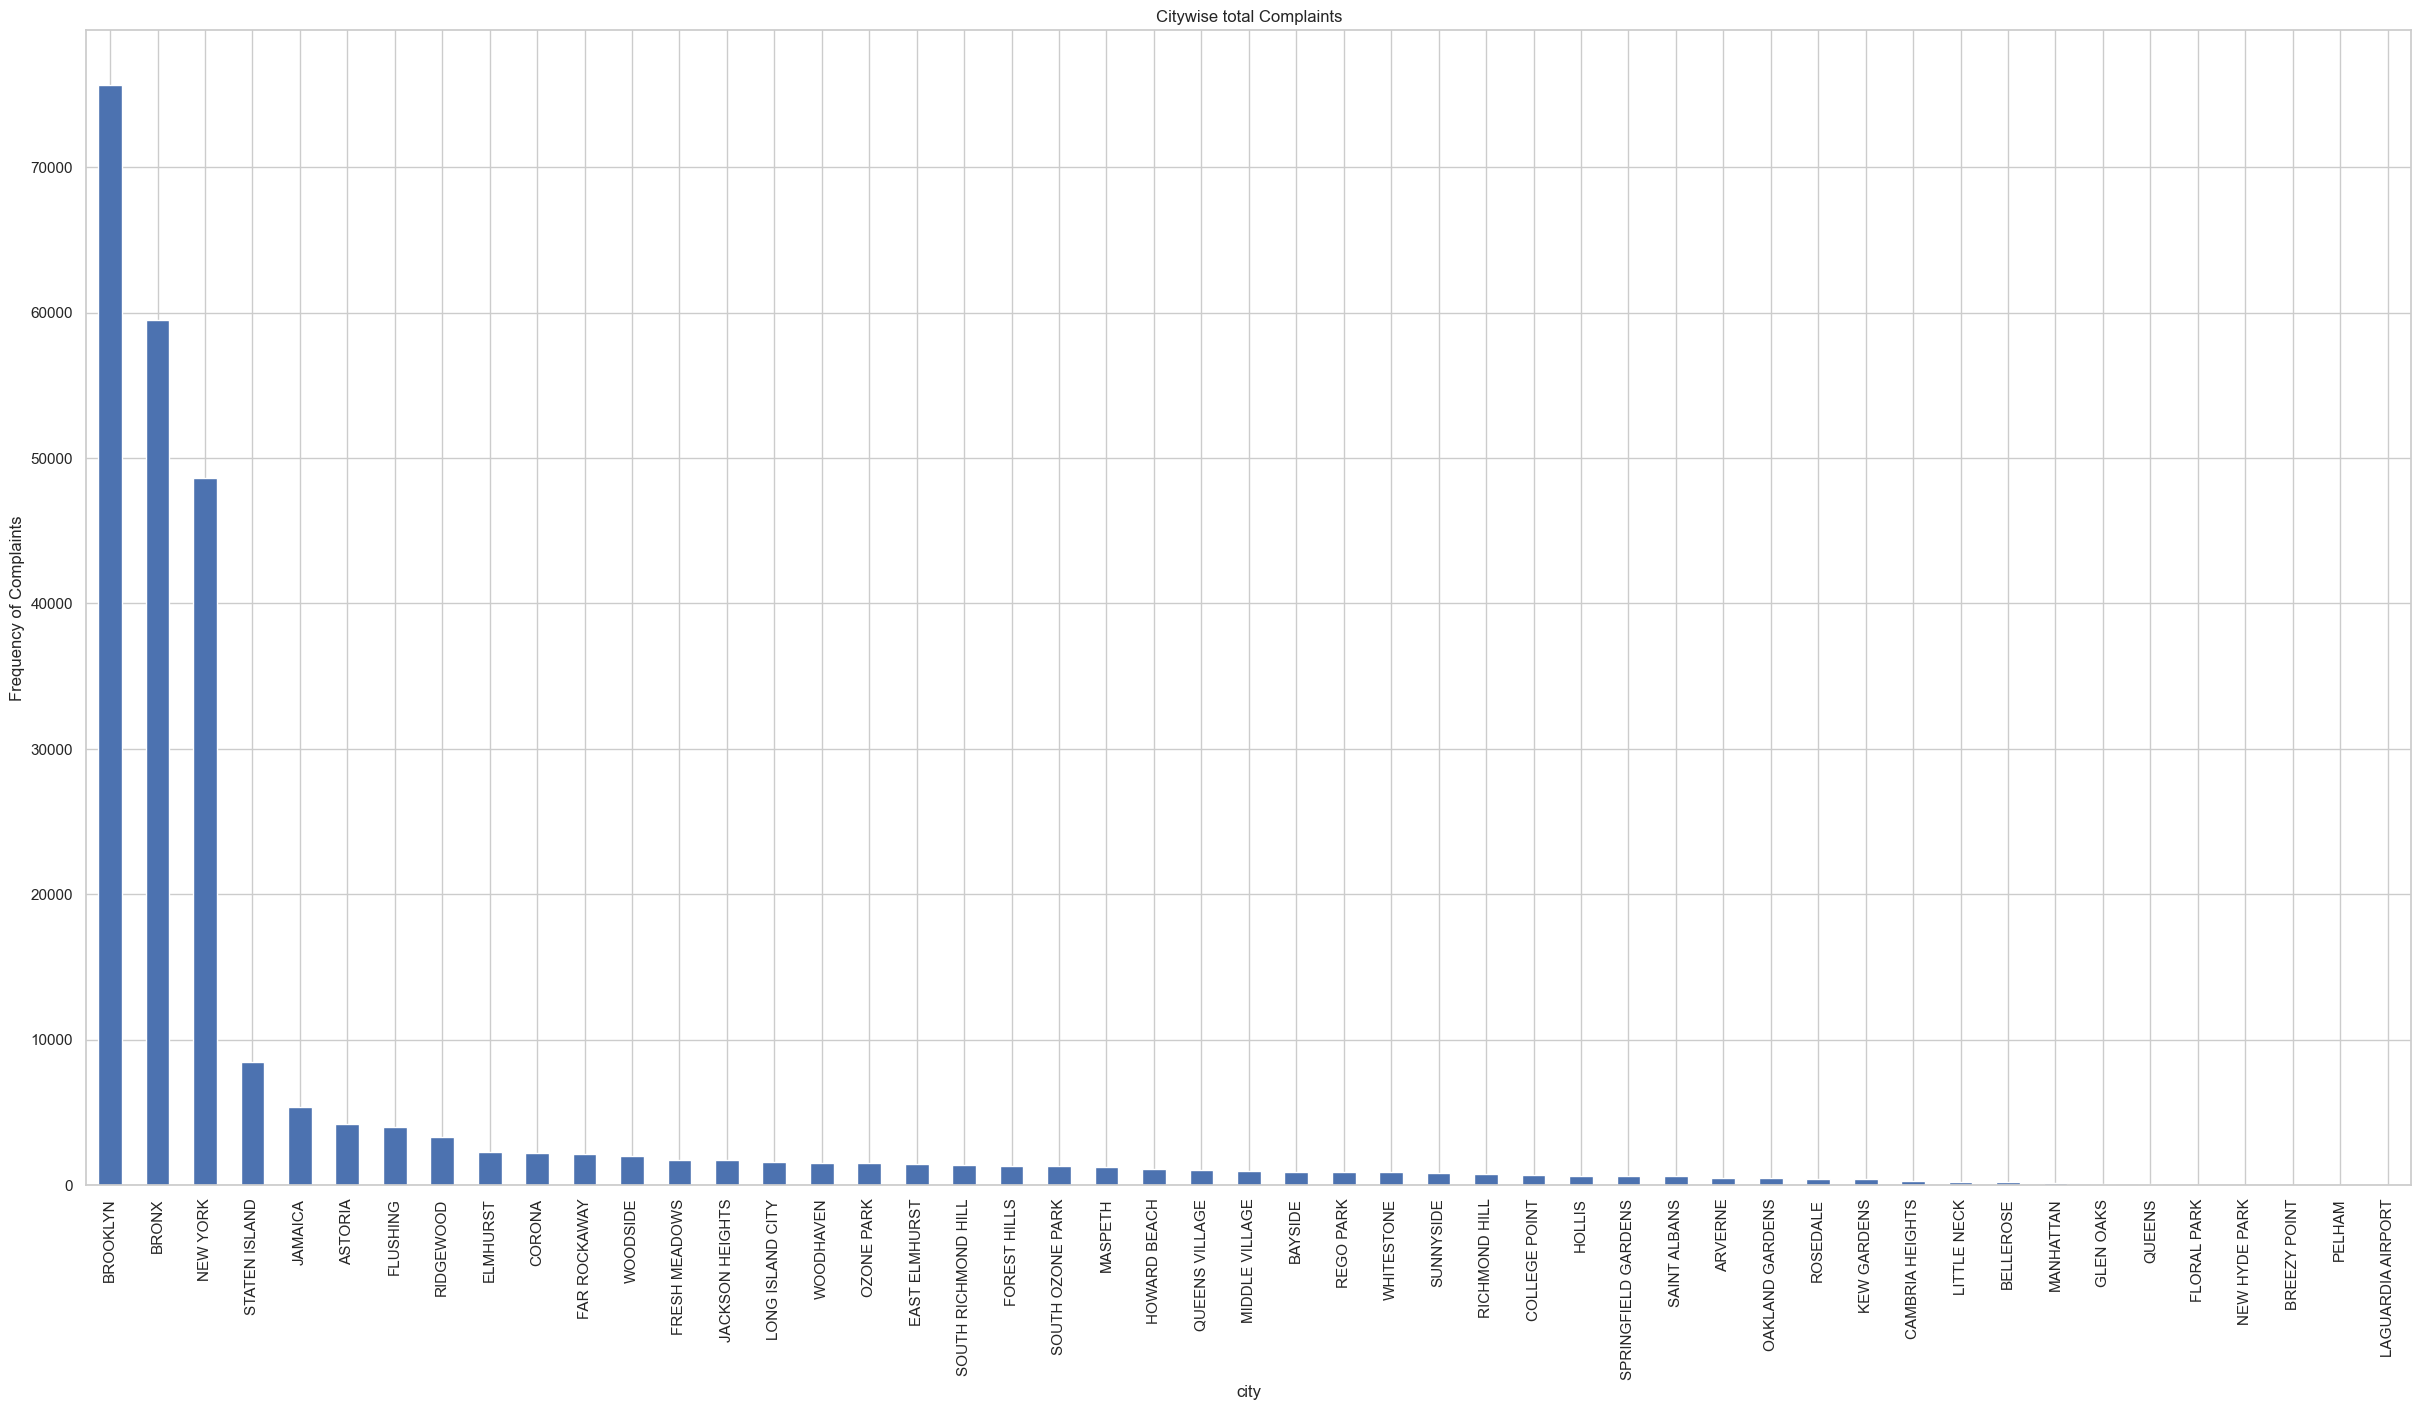

In [20]:
#Frequency plot for city-wise complaints

plt.figure(figsize=(30,15))
df2['city'].value_counts().plot(kind='bar',title='Citywise total Complaints', xlabel='city', ylabel='Frequency of Complaints')
plt.show()

#### So from the above plot we can conclude that Brooklyn City records highest number of complaints followed by New York city

<Axes: title={'center': 'Citywise top 20 Complaints'}, xlabel='city', ylabel='Frequency of Complaints'>

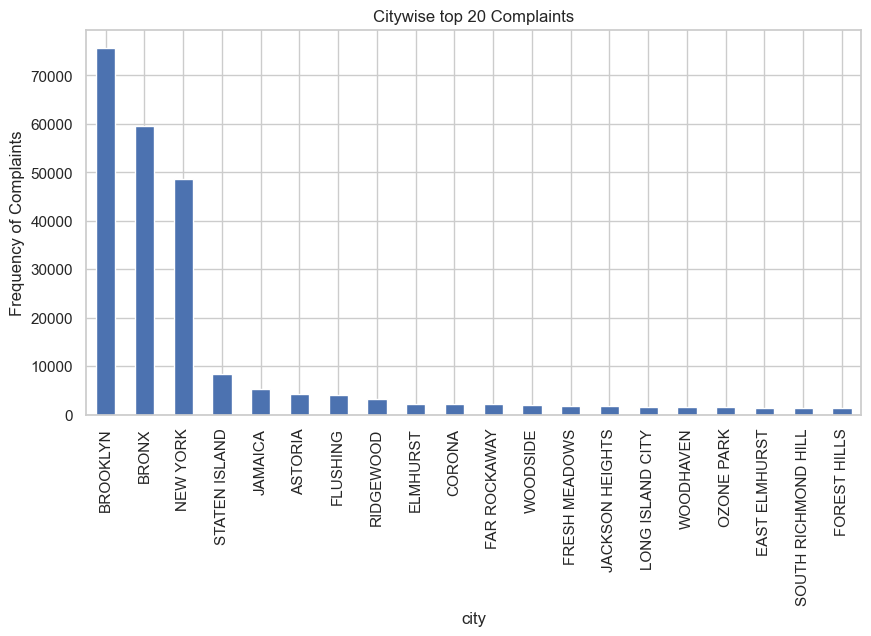

In [21]:
#Top 20 City-wise Complaints

plt.figure(figsize=(10,5))
df2['city'].value_counts().head(20).plot(kind='bar',title='Citywise top 20 Complaints', xlabel='city', ylabel='Frequency of Complaints')

(-74.27995159882273, -73.67367467156139, 40.478768276070696, 40.93354024861408)

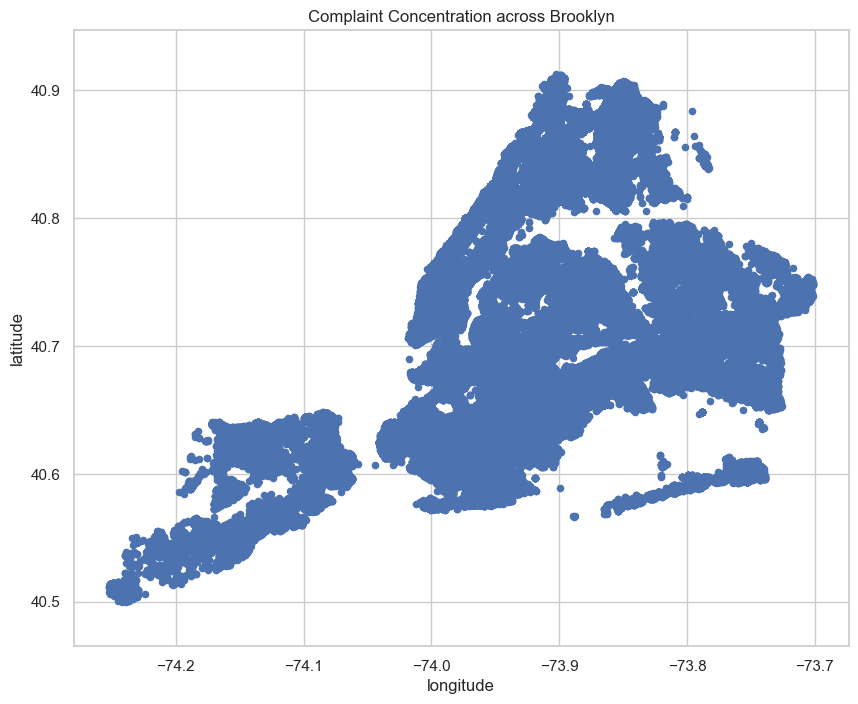

In [22]:
#Complaint concentration across Brooklyn    
#Scatter Plot
df2.plot(kind='scatter',x='longitude', y='latitude', figsize=(10,8),title = 'Complaint Concentration across Brooklyn').axis('equal')

(-74.279951599429, -73.67367467095512, 40.478768276070696, 40.93354024861408)

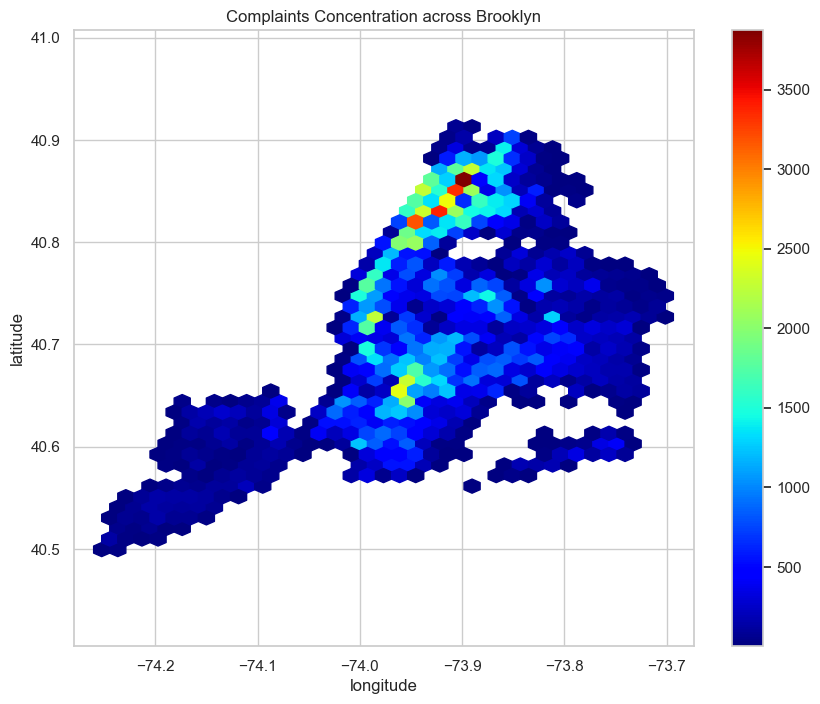

In [23]:
## Complaint concentration across Brooklyn   

#Hexbin Plot

df2.plot(kind='hexbin', x='longitude', y='latitude', gridsize=35,colormap = 'jet',mincnt=1,title = 'Complaints Concentration across Brooklyn', figsize=(10,8)).axis('equal')

#### In the above plots we can conclude that Hexbin plot gives a better indication of complaints concentration as compared to Scatter plot

(-74.27995159882273, -73.67367467156139, 40.478768276070696, 40.93354024861408)

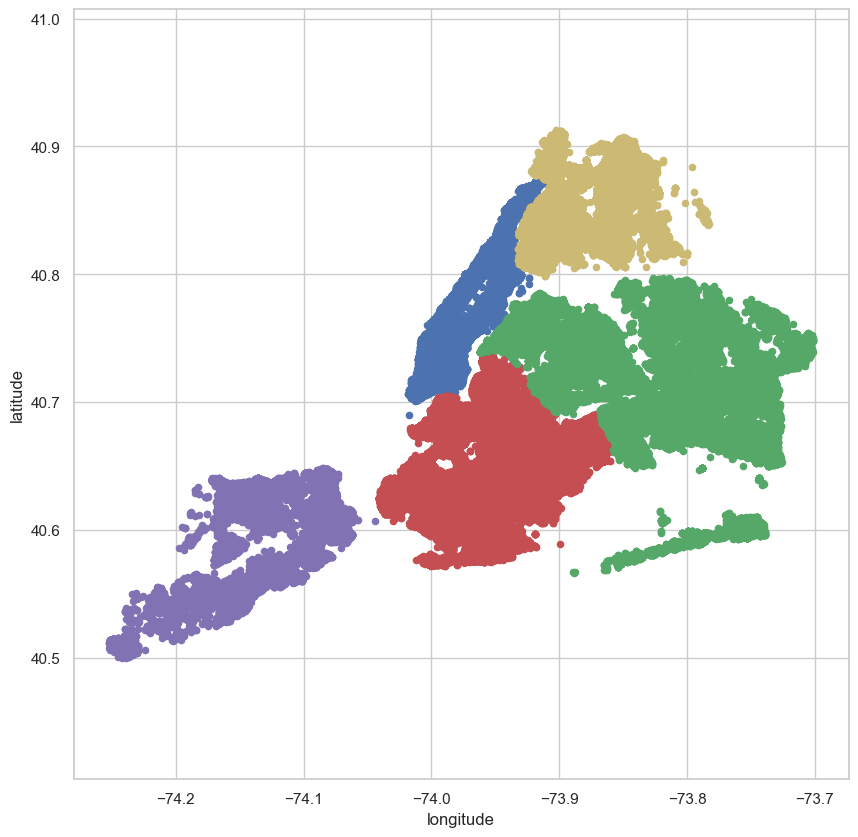

In [24]:
'latitude', 'longitude'
f, ax = plt.subplots()
df2[df2['borough'] == 'MANHATTAN'][['longitude', 'latitude']].plot(kind='scatter', x='longitude', y='latitude', ax=ax, figsize=(10,10)).axis('equal')
df2[df2['borough'] == 'BROOKLYN'][['longitude', 'latitude']].plot(kind='scatter', ax=ax, x='longitude', y='latitude', color='r', figsize=(10,10)).axis('equal')
df2[df2['borough'] == 'QUEENS'][['longitude', 'latitude']].plot(kind='scatter', ax=ax, x='longitude', y='latitude', color='g', figsize=(10,10)).axis('equal')
df2[df2['borough'] == 'BRONX'][['longitude', 'latitude']].plot(kind='scatter', ax=ax, x='longitude', y='latitude', color='y', figsize=(10,10)).axis('equal')
df2[df2['borough'] == 'STATEN ISLAND'][['longitude', 'latitude']].plot(kind='scatter', ax=ax, x='longitude', y='latitude', color='m', figsize=(10,10)).axis('equal')

# Find major types of complaints:
  - Plot a bar graph of count vs. complaint types 
  - Find the top 10 types of complaints 
  - Display the types of complaints in each city in a separate dataset
  -Identify the Top Complaint Type¶
    The goal of this section is to find the answer to the first question of the problem statement:


      Which type of complaint should the Department of Housing Preservation and Development of  first?

In [25]:
df['complaint_type'].unique() #Unique complaints

array(['Illegal Fireworks', 'Noise - Street/Sidewalk',
       'Noise - Residential', 'Rodent', 'Illegal Parking',
       'Abandoned Vehicle', 'GENERAL', 'Noise - Vehicle',
       'Blocked Driveway', 'HEAT/HOT WATER', 'Noise - Commercial',
       'Consumer Complaint', 'DOOR/WINDOW', 'Homeless Person Assistance',
       'WATER LEAK', 'FLOORING/STAIRS', 'ELECTRIC', 'PAINT/PLASTER',
       'UNSANITARY CONDITION', 'PLUMBING', 'Dirty Condition',
       'Illegal Dumping', 'Non-Emergency Police Matter', 'Animal-Abuse',
       'Missed Collection', 'Root/Sewer/Sidewalk Condition',
       'Panhandling', 'Obstruction', 'Noise - House of Worship',
       'Dead Animal', 'Graffiti', 'Drinking', 'Drug Activity',
       'New Tree Request', 'Street Condition', 'Sidewalk Condition',
       'Taxi Complaint', 'For Hire Vehicle Complaint', 'SAFETY',
       'Damaged Tree', 'Indoor Air Quality', 'Litter Basket Request',
       'Residential Disposal Complaint', 'Broken Parking Meter',
       'Street Sign - Mis

<Axes: title={'center': 'Count vs Complaint Types'}, xlabel='Complaint Types', ylabel='Counts'>

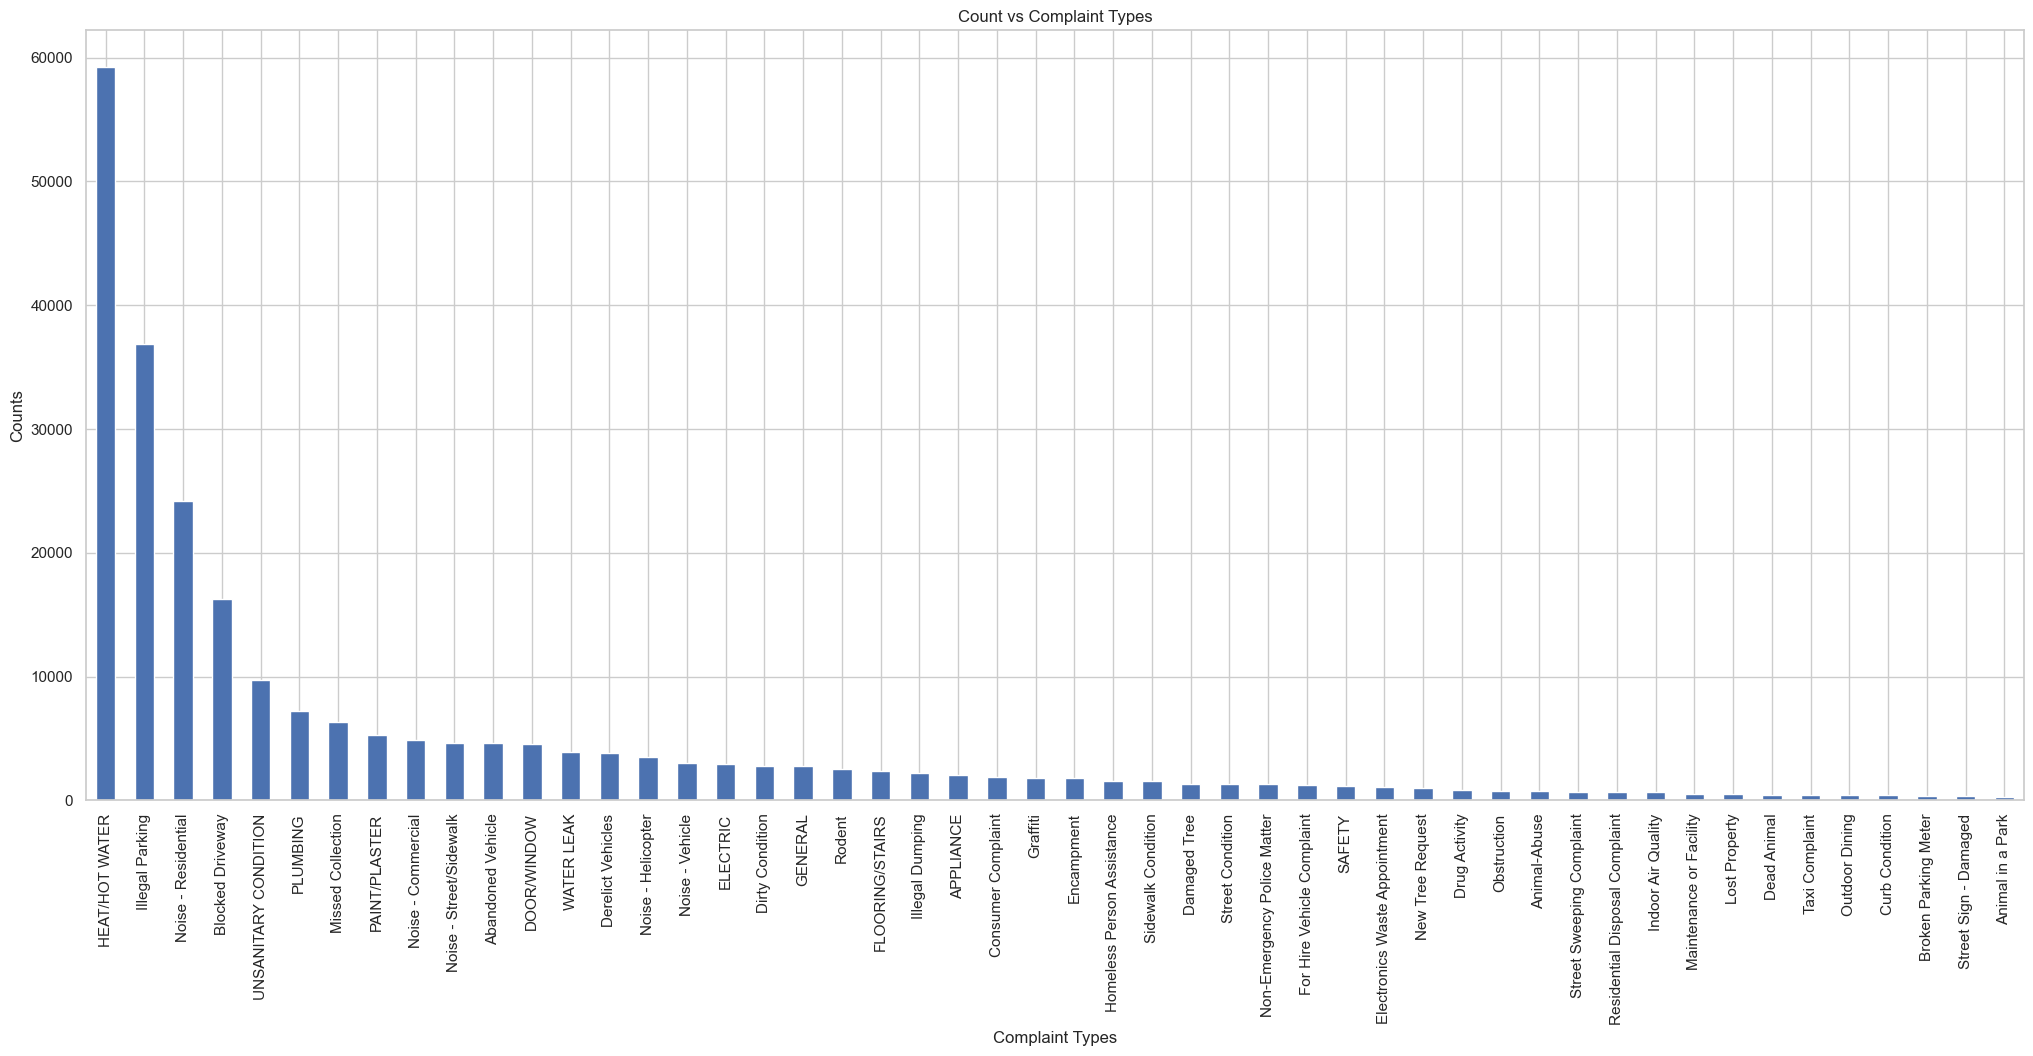

In [26]:
#Count vs Complaint Types

plt.figure(figsize=(25,10))
df2['complaint_type'].value_counts().head(50).plot(kind='bar',title='Count vs Complaint Types', xlabel='Complaint Types', ylabel='Counts')

#### HEAT/HOT WATER and Illegal Parking and Noise-Residential are the major Complaints in NYC followed by 

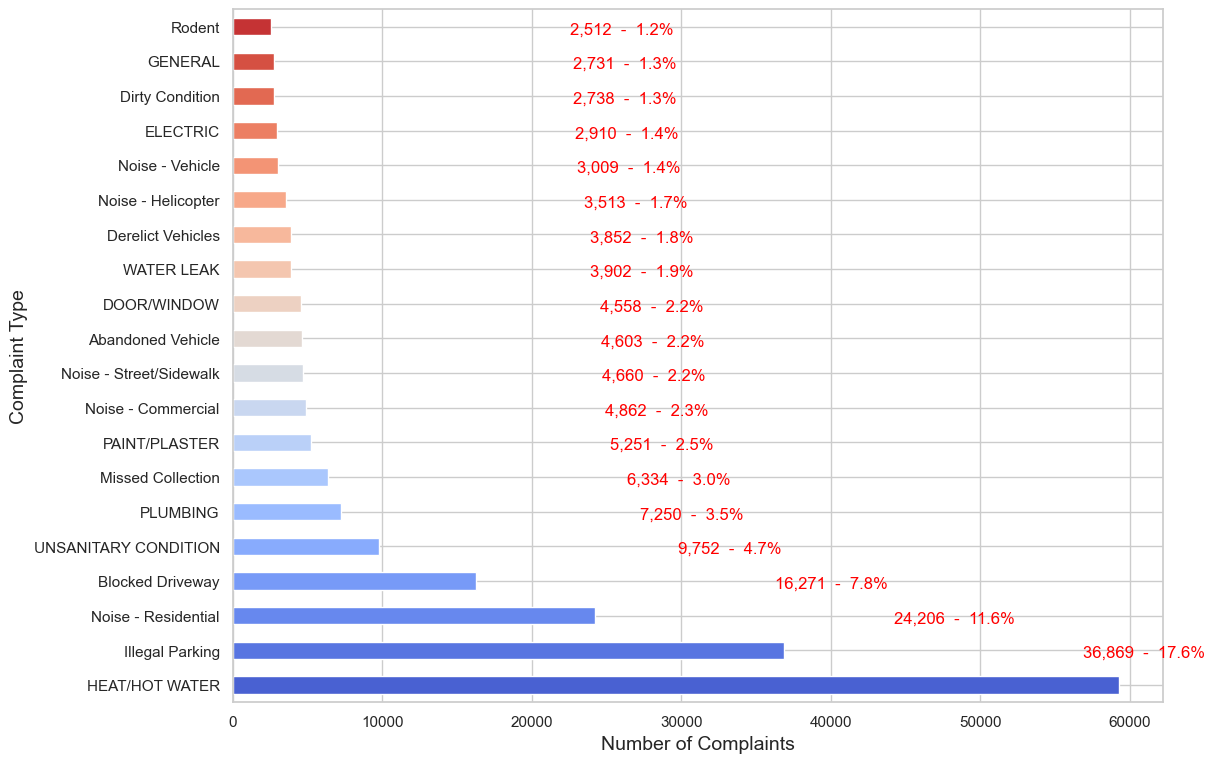

In [27]:
#Top 20 complaints
#

df_new = df2.copy()

# find the name of the less common complaints and rename all corresponding rows
idx = df2['complaint_type'].value_counts().sort_values().head(13).index
df_new.loc[df_new['complaint_type'].isin(idx), 'complaint_type'] = 'Rest'

df_complaints = df_new['complaint_type'].value_counts().head(20)

df_complaints.plot(kind = 'barh', figsize = (12, 9), fontsize = 11, color = sns.color_palette('coolwarm', len(df_complaints)))
plt.ylabel('Complaint Type', fontsize = 14)
plt.xlabel('Number of Complaints', fontsize = 14)

# Includes the number of incidents and the corresponding percentage for every type
for index, value in enumerate(df_complaints):    
    label = str(format(int(value), ',')) + '  -  {}%'.format(round( (value/df_complaints.sum())*100, 1)) 
    plt.annotate(label, xy = (value + 20000, index - 0.2 ), color = 'red')

#### Based on the previous analysis, the Department of Housing Preservation and Development of New York City should address the 'HEAT/HOT WATER' complaint first. This type of complaint has the highest number of reports (more than 2 million, amounting to 37% of all complaints) and has always been the most frequent complaint in every individual

In [28]:
df2['borough'].value_counts()

borough
BROOKLYN         75643
BRONX            59526
QUEENS           53335
MANHATTAN        48784
STATEN ISLAND     8467
Name: count, dtype: int64

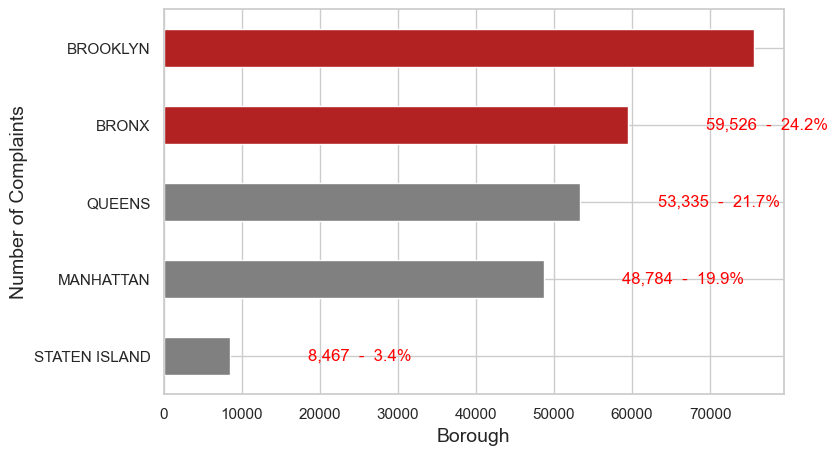

In [29]:
colors = ['Grey', 'Grey', 'Grey', 'Firebrick', 'Firebrick']
ny_borough = df2['borough'].value_counts().sort_values()

ny_borough.plot(kind = 'barh', figsize = (8,5), fontsize = 11, color = colors)
plt.xlabel('Borough', fontsize = 14)
plt.ylabel('Number of Complaints', fontsize = 14)

for index, value in enumerate(ny_borough):   
    label = str(format(int(value), ',')) + '  -  {}%'.format(round( (value/ny_borough.sum())*100, 1)) 
    plt.annotate(label, xy = (value + 10000, index - 0.05), color = 'red')

### herefore, the BROOKLYN is the NY borough with the highest number of 'HEAT/HOT WATER' reports (75,643) amounting to almost 1/3 of the total number. BRONX follows closely with 59,526 complaints.

In [30]:
#Preparing separate dataset to Display the types of complaints in each city

citywisecomplaints0 = df2.groupby(['city','complaint_type']).size()

citywisecomplaints = pd.DataFrame({'Count':citywisecomplaints0}).reset_index()

citywisecomplaints.head()#New Dataset

,city,complaint_type,Count
0,ARVERNE,APPLIANCE,14
1,ARVERNE,Abandoned Vehicle,5
2,ARVERNE,Animal in a Park,1
3,ARVERNE,Animal-Abuse,3
4,ARVERNE,Blocked Driveway,10


#### Visualize the major types of complaints in each city

In [31]:
citycomp = df2.groupby(['complaint_type', 'city']).size().unstack()
citycomp.head()


city,ARVERNE,ASTORIA,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,COLLEGE POINT,CORONA,EAST ELMHURST,ELMHURST,FAR ROCKAWAY,FLORAL PARK,FLUSHING,FOREST HILLS,FRESH MEADOWS,GLEN OAKS,HOLLIS,HOWARD BEACH,JACKSON HEIGHTS,JAMAICA,KEW GARDENS,LAGUARDIA AIRPORT,LITTLE NECK,LONG ISLAND CITY,MANHATTAN,MASPETH,MIDDLE VILLAGE,NEW HYDE PARK,NEW YORK,OAKLAND GARDENS,OZONE PARK,PELHAM,QUEENS,QUEENS VILLAGE,REGO PARK,RICHMOND HILL,RIDGEWOOD,ROSEDALE,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE
complaint_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
APPLIANCE,14.0,18.0,NaN,NaN,NaN,795.0,628.0,1.0,1.0,9.0,5.0,13.0,29.0,NaN,18.0,5.0,NaN,NaN,4.0,NaN,9.0,20.0,3.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,349.0,NaN,10.0,NaN,NaN,6.0,2.0,16.0,3.0,1.0,13.0,3.0,8.0,3.0,48.0,8.0,NaN,2.0,4.0
Abandoned Bike,NaN,5.0,NaN,NaN,NaN,2.0,59.0,NaN,NaN,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0
Abandoned Vehicle,5.0,60.0,43.0,12.0,NaN,631.0,1584.0,23.0,34.0,30.0,30.0,31.0,43.0,6.0,74.0,26.0,64.0,7.0,37.0,58.0,8.0,188.0,4.0,NaN,12.0,34.0,NaN,128.0,58.0,1.0,234.0,17.0,98.0,NaN,NaN,81.0,19.0,48.0,83.0,35.0,37.0,109.0,69.0,57.0,300.0,9.0,50.0,70.0,56.0
Adopt-A-Basket,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Animal Facility - No Permit,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
temp = df2['city'].value_counts()   #we previously investigated top Cities with maximum complaints
temp[:10]  

city
BROOKLYN         75643
BRONX            59525
NEW YORK         48631
STATEN ISLAND     8467
JAMAICA           5387
ASTORIA           4226
FLUSHING          3978
RIDGEWOOD         3287
ELMHURST          2264
CORONA            2236
Name: count, dtype: int64

#### we shall visualize the complaints only for top 10 cities as major complaints are from these cities and plotting all 53 cities is not feasible

In [33]:
temp[:10].keys()   

Index(['BROOKLYN', 'BRONX', 'NEW YORK', 'STATEN ISLAND', 'JAMAICA', 'ASTORIA',
       'FLUSHING', 'RIDGEWOOD', 'ELMHURST', 'CORONA'],
      dtype='object', name='city')

In [34]:
#preparing Dataset for top 10 complaint cities
city_topcomplaints = citycomp[['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA', 'ASTORIA','FLUSHING', 'RIDGEWOOD', 'CORONA', 'WOODSIDE']]
city_topcomplaints

city,BROOKLYN,NEW YORK,BRONX,STATEN ISLAND,JAMAICA,ASTORIA,FLUSHING,RIDGEWOOD,CORONA,WOODSIDE
complaint_type,,,,,,,,,,
APPLIANCE,628.0,349.0,795.0,48.0,20.0,18.0,18.0,3.0,9.0,4.0
Abandoned Bike,59.0,32.0,2.0,NaN,NaN,5.0,NaN,2.0,2.0,1.0
Abandoned Vehicle,1584.0,234.0,631.0,300.0,188.0,60.0,74.0,83.0,30.0,56.0
Adopt-A-Basket,3.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
Animal Facility - No Permit,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
Urinating in Public,6.0,10.0,7.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
Violation of Park Rules,28.0,52.0,20.0,NaN,NaN,NaN,1.0,NaN,3.0,NaN
WATER LEAK,1232.0,814.0,1342.0,101.0,61.0,32.0,37.0,24.0,11.0,14.0


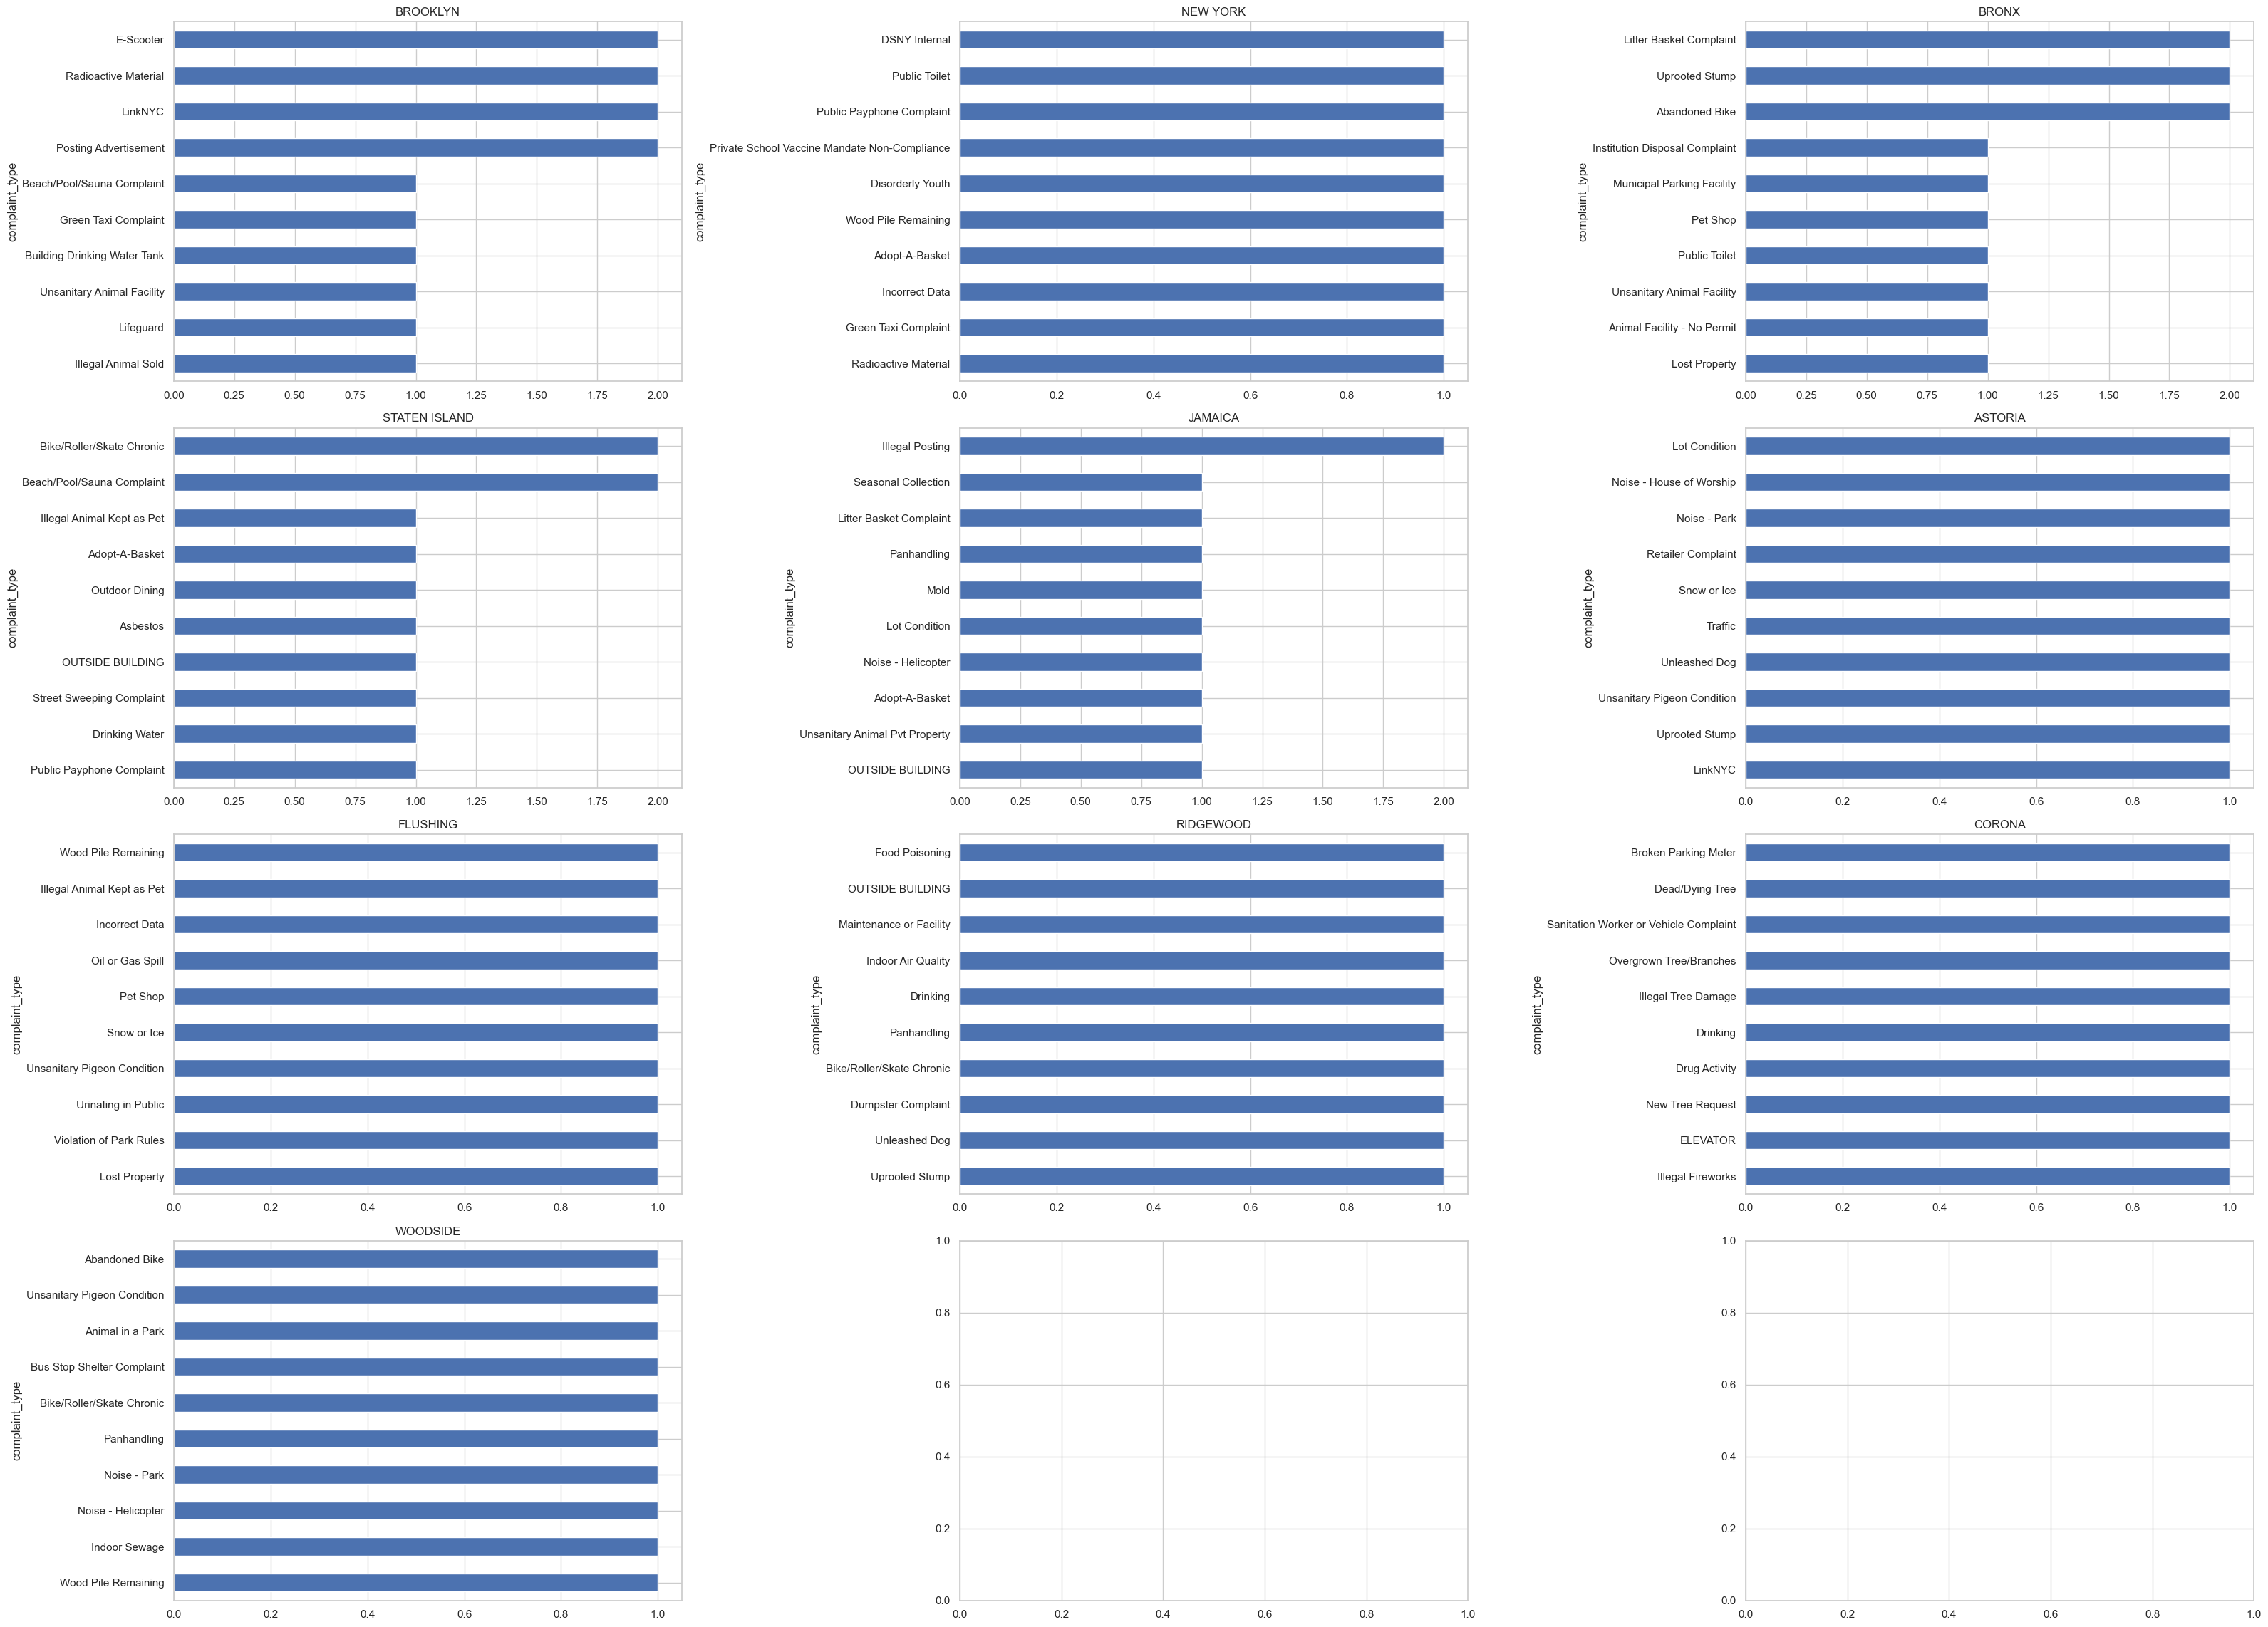

In [35]:
#visulization

col_number = 3
row_number = 4
fig, axes = plt.subplots(row_number,col_number, figsize=(32,23))

#for d, (label,col) in enumerate(city_topcomplaints.iteritems()):
for d, (label, col) in enumerate(city_topcomplaints.items()):
    ax = axes[int(d/col_number), d%col_number]
    col = col.sort_values(ascending=True)[:10]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout() 

In [40]:
df2.status.unique()

array(['Closed', 'Unspecified', 'Assigned', 'Open', 'Pending'],
      dtype=object)

In [41]:
df2['status'].value_counts()

status
Closed         245648
Unspecified        95
Open                6
Assigned            4
Pending             2
Name: count, dtype: int64

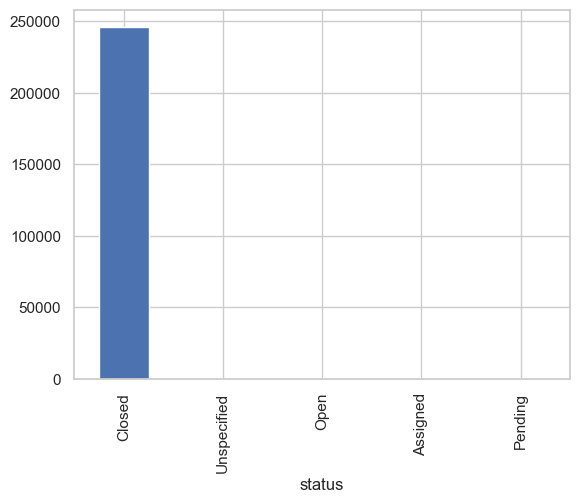

In [42]:
#checking the status of tickets
df2['status'].value_counts().plot(kind='bar')
plt.show()

In [43]:
df9 = df2.groupby(['city','complaint_type'])['Request_Closing_seconds'].mean() 
df9.unstack().fillna(0).head()

complaint_type,APPLIANCE,Abandoned Bike,Abandoned Vehicle,Adopt-A-Basket,Animal Facility - No Permit,Animal in a Park,Animal-Abuse,Asbestos,Beach/Pool/Sauna Complaint,Bike Rack Condition,Bike/Roller/Skate Chronic,Blocked Driveway,Broken Parking Meter,Building Condition,Building Drinking Water Tank,Bus Stop Shelter Complaint,Bus Stop Shelter Placement,Commercial Disposal Complaint,Consumer Complaint,Cooling Tower,Curb Condition,DOOR/WINDOW,DSNY Internal,Damaged Tree,Dead Animal,Dead/Dying Tree,Derelict Vehicles,Dirty Condition,Disorderly Youth,Drinking,Drinking Water,Drug Activity,Dumpster Complaint,E-Scooter,ELECTRIC,ELEVATOR,Electronics Waste Appointment,Encampment,FLOORING/STAIRS,Food Poisoning,For Hire Vehicle Complaint,GENERAL,Graffiti,Green Taxi Complaint,HEAT/HOT WATER,Homeless Person Assistance,Illegal Animal Kept as Pet,Illegal Animal Sold,Illegal Dumping,Illegal Fireworks,Illegal Parking,Illegal Posting,Illegal Tree Damage,Incorrect Data,Indoor Air Quality,Indoor Sewage,Institution Disposal Complaint,Lifeguard,LinkNYC,Litter Basket Complaint,Litter Basket Request,Lost Property,Lot Condition,Maintenance or Facility,Missed Collection,Mold,Municipal Parking Facility,New Tree Request,Noise - Commercial,Noise - Helicopter,Noise - House of Worship,Noise - Park,Noise - Residential,Noise - Street/Sidewalk,Noise - Vehicle,Non-Emergency Police Matter,OUTSIDE BUILDING,Obstruction,Oil or Gas Spill,Outdoor Dining,Overgrown Tree/Branches,PAINT/PLASTER,PLUMBING,Panhandling,Pet Shop,Posting Advertisement,Private School Vaccine Mandate Non-Compliance,Public Payphone Complaint,Public Toilet,Radioactive Material,Recycling Basket Complaint,Residential Disposal Complaint,Retailer Complaint,Rodent,Root/Sewer/Sidewalk Condition,SAFETY,Sanitation Worker or Vehicle Complaint,School Maintenance,Seasonal Collection,Sidewalk Condition,Snow or Ice,Squeegee,Street Condition,Street Sign - Damaged,Street Sign - Dangling,Street Sign - Missing,Street Sweeping Complaint,Taxi Complaint,Traffic,UNSANITARY CONDITION,Unleashed Dog,Unsanitary Animal Facility,Unsanitary Animal Pvt Property,Unsanitary Pigeon Condition,Uprooted Stump,Urinating in Public,Violation of Park Rules,WATER LEAK,Wood Pile Remaining,X-Ray Machine/Equipment
city,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARVERNE,2.908695e+06,0.0,9683.800000,0.0,0.0,6320685.0,5788.333333,0.0,0.0,0.0,0.0,5044.800000,0.000000,0.0,0.0,0.0,0.0,0.0,62483.500000,0.0,0.000000e+00,8.815573e+05,0.0,0.000000e+00,0.000000,0.000000e+00,475200.0,739085.333333,0.0,0.000000,0.0,0.0,0.00,0.0,2.171185e+06,10290459.0,0.0,0.000000,1.013315e+06,172801.0,0.000000e+00,1.333690e+06,0.000000e+00,0.0,311031.434783,321.00,0.0,0.0,812579.000000,0.0,5149.076923,0.0,0.000000e+00,0.0,61179.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9844067.0,58212.00,834215.264706,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,7314.449275,5859.000000,0.000000,5637.000000,0.0,0.000000,0.0,0.00000,0.0,2.018402e+06,3.401199e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.020278e+06,0.0,2.315406e+06,0.000000e+00,1.533340e+05,0.000000,0.0,0.0,6.503345e+05,1048543.0,0.0,254934.400000,4.755362e+06,267941.0,309198.0,216844.000000,0.0,0.0,2.660349e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.035548e+06,0.0,0.0
ASTORIA,4.258688e+06,231655.4,9227.050000,0.0,0.0,3542.5,7541.909091,3017405.5,0.0,0.0,3548.0,8674.366667,264945.823529,0.0,522733.0,1112113.0,0.0,632139.0,202804.266667,0.0,1.656183e+06,2.758458e+06,0.0,1.663086e+06,233973.333333,1.790433e+06,51840.0,694052.261905,0.0,9250.125000,0.0,6224.0,669704.00,0.0,2.694817e+06,5663145.0,0.0,50913.818182,2.092854e+06,86401.0,9.175316e+06,3.638601e+06,1.507034e+07,0.0,307402.089431,28697.75,0.0,0.0,333477.046512,8886.5,7982.670354,1505722.0,5.280019e+06,0.0,51119.888889,0.0,0.0,0.0,5492.0,0.0,7682.0,54739.0,6659440.0,4133355.25,277025.536585,0.0,0.0,603793.0,5632.158416,1454296.0,1910.0,7795.0,5462.843972,6767.546875,4870.444444,4031.636364,0.0,568457.150000,0.0,512394.54902,29848

[Text(0, 0, 'Illegal Fireworks'),
 Text(1, 0, 'Noise - Residential'),
 Text(2, 0, 'Noise - Street/Sidewalk'),
 Text(3, 0, 'GENERAL'),
 Text(4, 0, 'HEAT/HOT WATER'),
 Text(5, 0, 'Illegal Parking'),
 Text(6, 0, 'Blocked Driveway'),
 Text(7, 0, 'Noise - Vehicle'),
 Text(8, 0, 'Illegal Dumping'),
 Text(9, 0, 'Non-Emergency Police Matter'),
 Text(10, 0, 'Noise - Commercial'),
 Text(11, 0, 'PLUMBING'),
 Text(12, 0, 'Missed Collection'),
 Text(13, 0, 'Animal-Abuse'),
 Text(14, 0, 'Dead Animal'),
 Text(15, 0, 'Abandoned Vehicle'),
 Text(16, 0, 'Graffiti'),
 Text(17, 0, 'UNSANITARY CONDITION'),
 Text(18, 0, 'WATER LEAK'),
 Text(19, 0, 'Consumer Complaint'),
 Text(20, 0, 'Rodent'),
 Text(21, 0, 'For Hire Vehicle Complaint'),
 Text(22, 0, 'Dirty Condition'),
 Text(23, 0, 'SAFETY'),
 Text(24, 0, 'DOOR/WINDOW'),
 Text(25, 0, 'PAINT/PLASTER'),
 Text(26, 0, 'FLOORING/STAIRS'),
 Text(27, 0, 'Indoor Air Quality'),
 Text(28, 0, 'ELECTRIC'),
 Text(29, 0, 'Drinking'),
 Text(30, 0, 'Litter Basket Request')

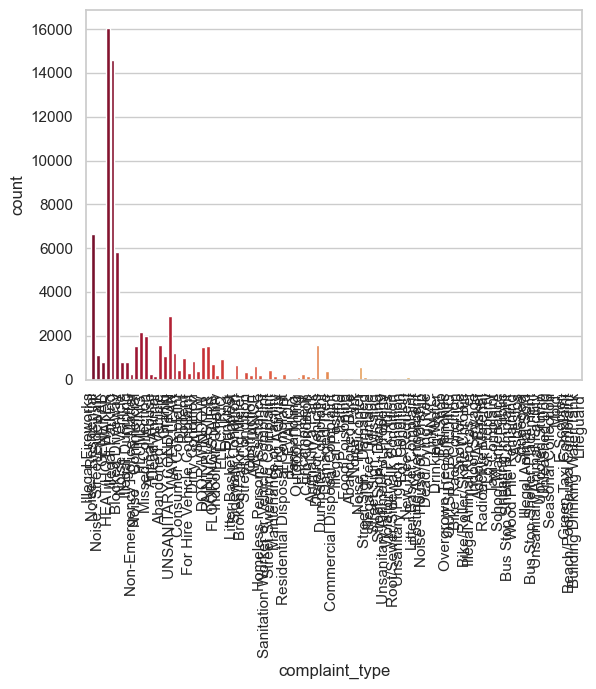

In [44]:
#  Since maximum number of complaints were filed in Brooklyn, complaint data was analysed for this city.
# Blocked Driveway was found to be the most frequent complaint lodged to NYPD in the city of Brooklyn.
df2.loc[(df2['city']=='BROOKLYN'),:]['complaint_type'].value_counts()
plot_3= sns.countplot(x=df2.loc[df2.city=='BROOKLYN']['complaint_type'], palette='YlOrRd_r')
plot_3.set_xticklabels(plot_3.get_xticklabels(), rotation=90)

<Axes: xlabel='agency_name,complaint_type'>

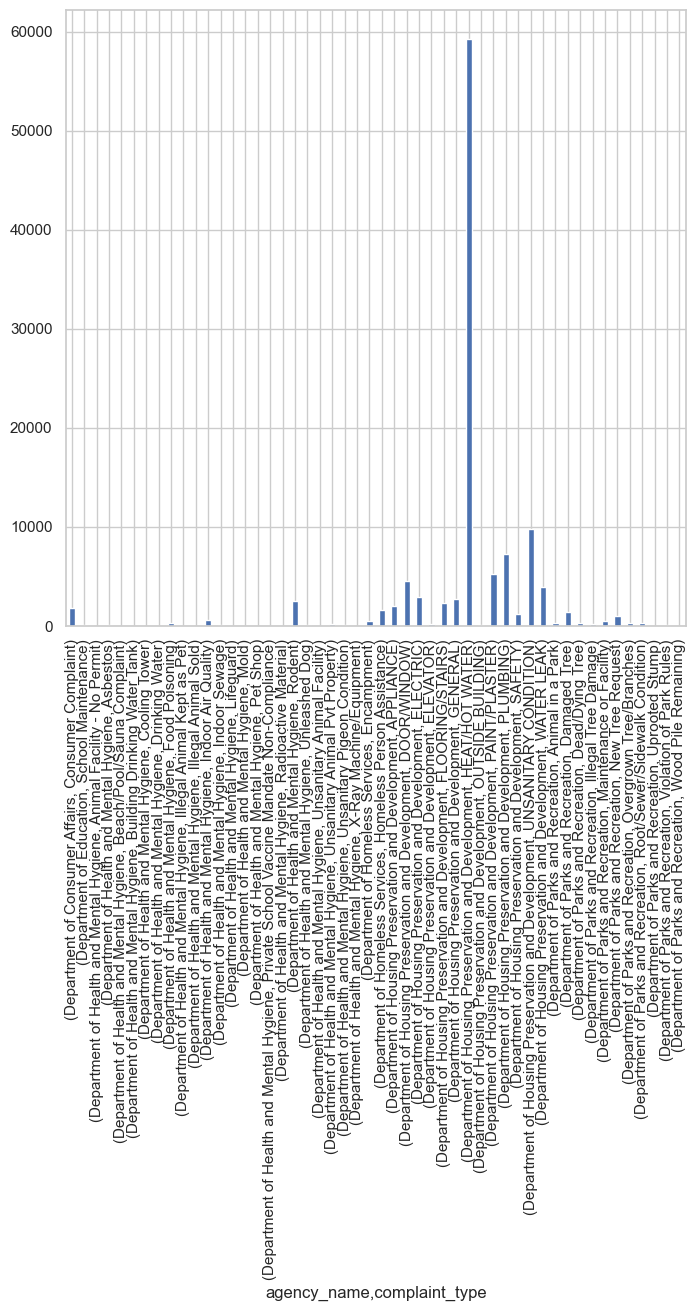

In [45]:
#  It was found that al the complaints were lodged to New York Police Department
df3=df2.groupby(['agency_name','complaint_type']).size().head(50)
df3.plot.bar(figsize=(8,8))

# location_type

In [46]:
df2['location_type'].unique()

array(['Street/Sidewalk', 'Residential Building/House',
       '3+ Family Apt. Building', 'RESIDENTIAL BUILDING',
       'Store/Commercial', 'Park/Playground', 'Business',
       'Club/Bar/Restaurant', 'Sidewalk', 'Street', 'House of Worship',
       'Comercial', 'Other (Explain Below)', 'Alley',
       '3+ Family Apartment Building', 'Vacant Lot', 'Highway', 'Taxi',
       'Lobby', 'Yard', 'Commercial Building', 'Parking Lot/Garage',
       'Park', 'Gutter', '1-2 Family Dwelling', 'Other',
       '1-2 Family Mixed Use Building', 'Lot', 'Hallway',
       'House and Store', 'Mixed Use', 'Curb',
       'Restaurant/Bar/Deli/Bakery', 'Above Address', 'Stairwell',
       'Construction Site', 'Residence', 'Crosswalk',
       '3+ Family Mixed Use Building', 'Vacant Building', 'Residential',
       'Street/Curbside', 'Bus Stop Shelter', 'Common Area',
       'Public Garden', 'Parking Lot', 'Residential Building',
       'Bike Lane', 'Pool', '1-3 Family Dwelling', 'Public/Unfenced Area',
      

In [47]:
df2['location_type'].value_counts().head(10)

location_type
RESIDENTIAL BUILDING          101381
Street/Sidewalk                69016
Residential Building/House     26103
Street                         20969
Sidewalk                        8188
Above Address                   3513
Store/Commercial                3498
Club/Bar/Restaurant             2311
Business                        1847
3+ Family Apt. Building         1288
Name: count, dtype: int64

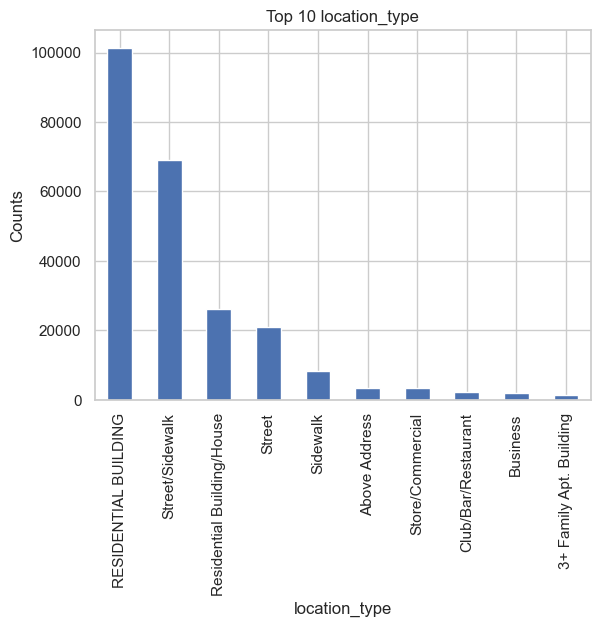

In [48]:
df2['location_type'].value_counts().head(10).plot(kind='bar',title='Top 10 location_type', xlabel='location_type', ylabel='Counts')
plt.show()

#### The maximum complaints were regarding RESIDENTIAL BUILDING and Street and Sidwalk which indicate that ,, there is a scope for improvement in strict measures on the road thus Traffic police can look into this matter

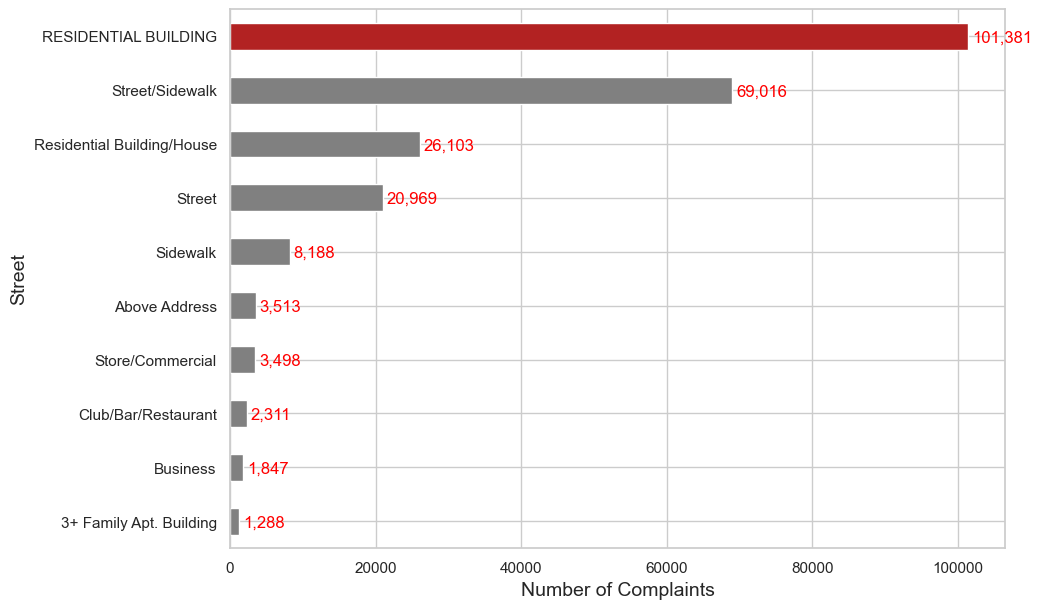

In [49]:
colors = ['Grey', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey', 'firebrick']
ny_streets = df2['location_type'].value_counts().head(10).sort_values()

ny_streets.plot(kind = 'barh', figsize = (10, 7), fontsize = 11, color = colors)
plt.ylabel('Street', fontsize = 14)
plt.xlabel('Number of Complaints', fontsize = 14)

for index, value in enumerate(ny_streets):   
    label = str(format(int(value), ',')) 
    plt.annotate(label, xy = (value + 500, index - 0.1), color = 'red')

#### RESIDENTIAL BUILDING is the street with the highest number of submitted complaints (101,381).

In [50]:
print('Grand Concourse\n\tBorough: ', df[df['location_type'] == 'RESIDENTIAL BUILDING'].iloc[0]['borough'])

Grand Concourse
	Borough:  BROOKLYN


#### RESIDENTIAL BUILDING belongs in the BROOKLYN, the most affected borough of NY.




#  from the above analysis of the 'HEAT/HOT WATER' complaint, we can conclude that the Department of Housing Preservation and Development of New York City should focus on:

- Brooklyn and Bronx , since they are the first and second most affected boroughs in NYC, respectively,
   Houses in Bronx with  and
   RESIDENTIAL BUILDING, a severely affected street in the Brooklyn.




#  Major Complaint types and their count

In [41]:
value_counts =df2['complaint_type'].value_counts()
value_counts.head()

complaint_type
HEAT/HOT WATER          59249
Illegal Parking         36869
Noise - Residential     24206
Blocked Driveway        16271
UNSANITARY CONDITION     9752
Name: count, dtype: int64

In [42]:
def Pie(feature,Limit=5) : 
    global df2
    fig, ax = plt.subplots(figsize=(10,6))
    plt.pie(df2[feature].value_counts()[:Limit],labels=list(
        df2[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(df2[feature].value_counts()[:Limit]))] )
plt.show()     

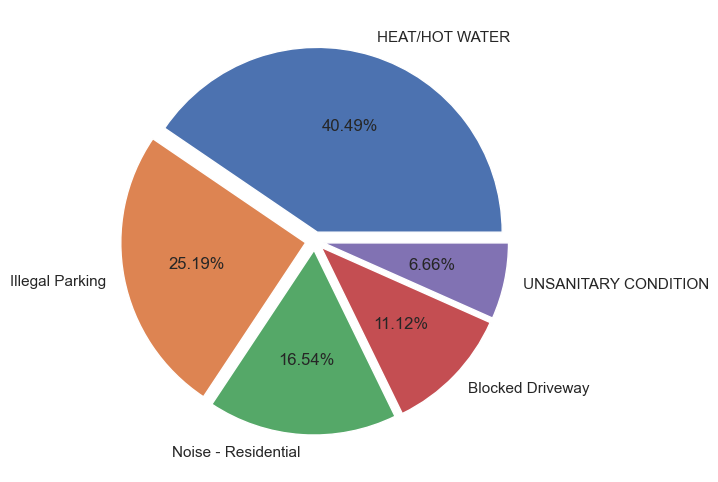

In [43]:
Pie('complaint_type')

#### Based on the previous analysis, the Department of Housing Preservation and Development of New York City should address the 'HEAT/HOT WATER' complaint first. This type of complaint has the highest number of reports ( amounting to 41% of all complaints) and has always been the most frequent complaint in every individual year since 2022.

### Plot the hourly distribution of total complaints activity in a bar plot. (Use the 'created_date' column to get the hour for each complaint record)

In [44]:
df2['created_hours'].unique()

array([23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3,  2,  1,  0])

<Axes: xlabel='created_hours'>

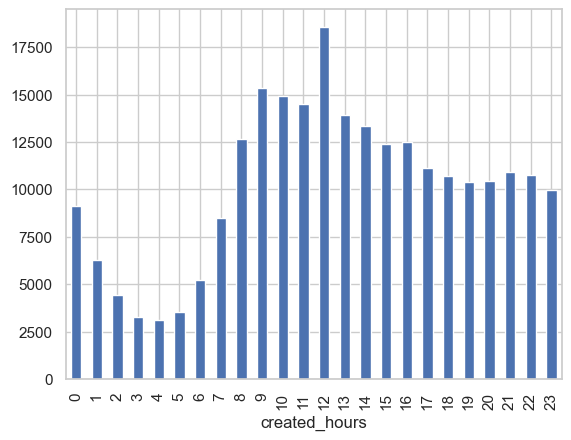

In [45]:
df2['created_hours'].value_counts().sort_index().plot.bar()

In [46]:
def BarPercentage(feature,Limit=3) : 
    global Top_3
    fig, ax = plt.subplots(figsize=(10,6))
    plt.pie(Top_3[feature].value_counts()[:Limit],labels=list(
       Top_3[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(Top_3[feature].value_counts()[:Limit]))] )
    plt.show()

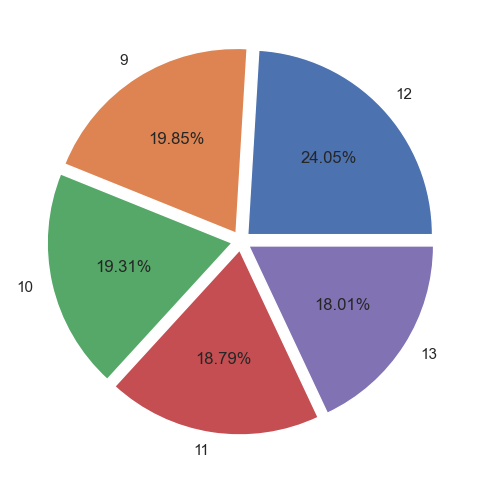

In [47]:
Pie('created_hours')

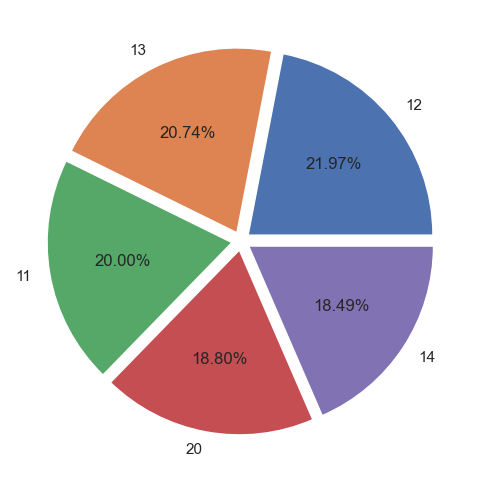

In [48]:
Pie('closed_hours')

Text(0.5, 1.0, 'Average Request Closing Time for Boroughs')

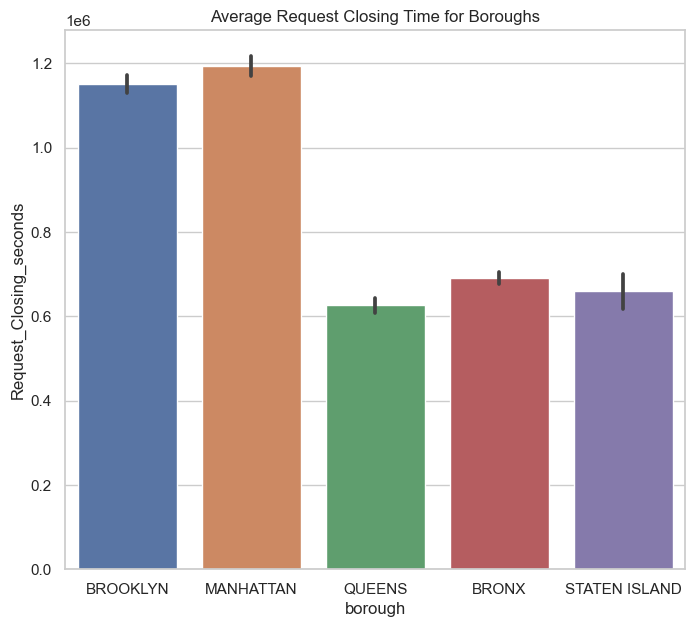

In [49]:
plt.figure(figsize=(8,7))
sns.barplot(x='borough', y='Request_Closing_seconds', data=df2)
plt.title('Average Request Closing Time for Boroughs')

### Average Request Closing Time for various Compaints

In [50]:
df7=df2[['complaint_type', 'Request_Closing_seconds']]
df8=df7.groupby('complaint_type')['Request_Closing_seconds'].mean().fillna(0).to_frame().head(10)

In [51]:
df8.head()

,Request_Closing_seconds
complaint_type,
APPLIANCE,3.613648e+06
Abandoned Bike,9.882580e+05
Abandoned Vehicle,1.328191e+04
Adopt-A-Basket,1.281919e+07
Animal Facility - No Permit,0.000000e+00


# agency

In [52]:
df2['agency'].unique()     # Unique complaints

array(['NYPD', 'DOHMH', 'HPD', 'DCA', 'DHS', 'DSNY', 'DPR', 'DOT', 'TLC',
       'EDC', 'OTI', 'DOE'], dtype=object)

<Axes: xlabel='agency'>

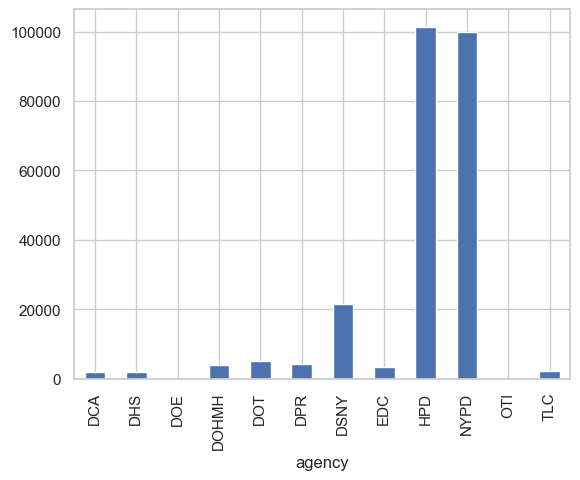

In [53]:
df2['agency'].value_counts().sort_index().plot.bar()

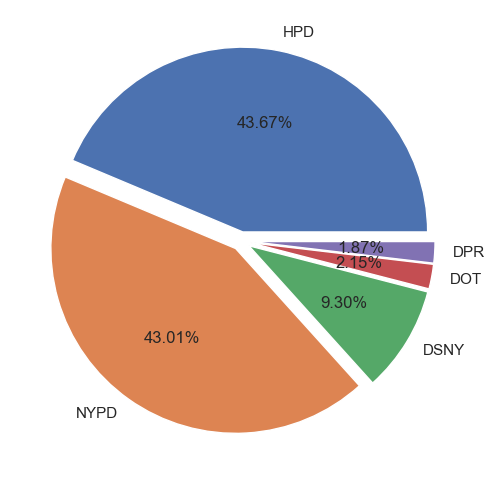

In [54]:
# top 10 agancy
Pie('agency')

#### Counts per Year and Borough

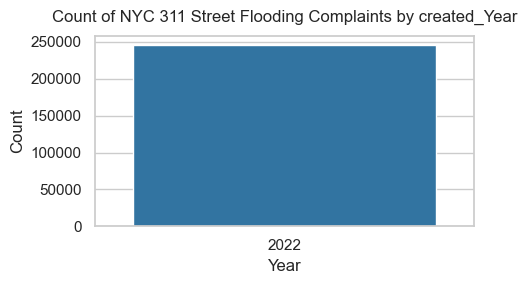

In [55]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.countplot(x=df2['created_Year'], color='#1f77b4')

label = 'Count of NYC 311 Street Flooding Complaints by created_Year'
plt.title(label, fontsize=12, pad=10)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()  

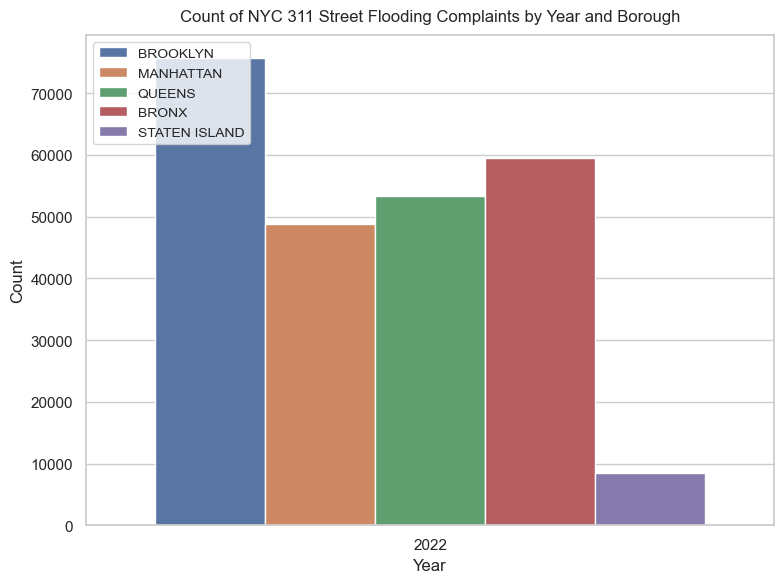

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x=df2['created_Year'], hue=df2['borough'])

label = 'Count of NYC 311 Street Flooding Complaints by Year and Borough'
plt.title(label, fontsize=12, pad=10)

plt.legend(loc=2, fontsize=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()

In [57]:
# transform to pivot table
pivot_df = pd.pivot_table(
    df2,
    values='unique_key',
    index=['created_Year'],
    columns=['borough'],
    aggfunc=pd.Series.nunique
)

# order items in legend consistent to above plot
cols =['BROOKLYN', 'MANHATTAN', 'QUEENS', 'BRONX', 'STATEN ISLAND']
pivot_df = pivot_df.loc[:, cols]

# examine pivot table
pivot_df.head()

borough,BROOKLYN,MANHATTAN,QUEENS,BRONX,STATEN ISLAND
created_Year,,,,,
2022,75643,48784,53335,59526,8467


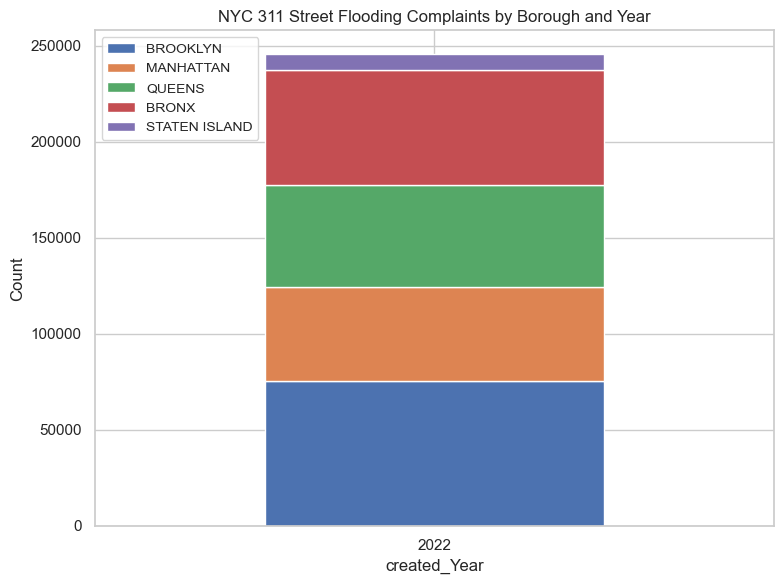

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))

pivot_df.plot.bar(stacked=True, ax=ax)

label = 'NYC 311 Street Flooding Complaints by Borough and Year'
plt.title(label, fontsize=12)

plt.legend(loc=2, fontsize=10)
plt.xlabel('created_Year')
plt.ylabel('Count')

plt.xticks(rotation=0)

plt.tight_layout()

###### Looking more closely at the descriptor field.

In [59]:
# preview description
(df2['descriptor']
 .value_counts()
 .reset_index()
 .rename(columns={'index':'descriptor', 'descriptor':'count'})
 .head()
)


,count,count
0,ENTIRE BUILDING,38178
1,APARTMENT ONLY,21071
2,Loud Music/Party,19389
3,No Access,12312
4,Blocked Hydrant,11990


In [60]:
print('Top 10 descriptor In Descending Order:\n')

for i in range(1, 200):
    res = df2['descriptor'].value_counts().index[i]
    count = df2['descriptor'].value_counts()[i]
    
    print('{}. {}'.format(i, res))
    print('-- Count: {:,}\n'.format(count))

Top 10 descriptor In Descending Order:

1. APARTMENT ONLY
-- Count: 21,071

2. Loud Music/Party
-- Count: 19,389

3. No Access
-- Count: 12,312

4. Blocked Hydrant
-- Count: 11,990

5. Banging/Pounding
-- Count: 10,069

6. Posted Parking Sign Violation
-- Count: 8,529

7. PESTS
-- Count: 5,209

8. Trash
-- Count: 4,806



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

9. With License Plate
-- Count: 4,603

10. Partial Access
-- Count: 3,959

11. Derelict Vehicles
-- Count: 3,852

12. Loud Talking
-- Count: 3,799

13. Other
-- Count: 3,608

14. Blocked Sidewalk
-- Count: 3,587

15. Commercial Overnight Parking
-- Count: 3,137

16. MOLD
-- Count: 2,792

17. WALL
-- Count: 2,488

18. WATER SUPPLY
-- Count: 2,402



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

19. CEILING
-- Count: 2,393

20. Blocked Bike Lane
-- Count: 2,329

21. FLOOR
-- Count: 2,230

22. DOOR
-- Count: 2,102

23. HEAVY FLOW
-- Count: 1,956

24. Double Parked Blocking Traffic
-- Count: 1,823

25. Removal Request
-- Count: 1,792

26. WINDOW FRAME
-- Count: 1,684

27. BASIN/SINK
-- Count: 1,675

28. Blocked Crosswalk
-- Count: 1,627



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

29. Graffiti
-- Count: 1,610

30. SLOW LEAK
-- Count: 1,519

31. Rat Sighting
-- Count: 1,515

32. Car/Truck Music
-- Count: 1,509

33. GARBAGE/RECYCLING STORAGE
-- Count: 1,496

34. ELECTRIC/GAS RANGE
-- Count: 1,323

35. BATHTUB/SHOWER
-- Count: 1,265

36. Double Parked Blocking Vehicle
-- Count: 1,220

37. Driver Complaint - Non Passenger
-- Count: 1,127

38. Ewaste appointment
-- Count: 1,102

39. Paper License Plates
-- Count: 1,089



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

40. TOILET
-- Count: 1,022

41. Bulky Trash
-- Count: 1,021

42. Other (complaint details)
-- Count: 1,013

43. For One Address
-- Count: 1,008

44. Car/Truck Horn
-- Count: 855

45. POWER OUTAGE
-- Count: 844

46. Parking Permit Improper Use
-- Count: 839

47. CABINET
-- Count: 831

48. Engine Idling
-- Count: 814



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

49. Recycling - Paper/Metal/Glass/Rigid Plastic
-- Count: 809

50. Sidewalk Violation
-- Count: 775

51. RADIATOR
-- Count: 748

52. BELL/BUZZER/INTERCOM
-- Count: 740

53. REFRIGERATOR
-- Count: 726

54. OUTLET/SWITCH
-- Count: 716

55. NO LIGHTING
-- Count: 689

56. Use Outside
-- Count: 643

57. Recycling - Paper
-- Count: 637



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

58. COOKING GAS
-- Count: 593

59. Loud Television
-- Count: 581

60. Broken Sidewalk
-- Count: 538

61. Branch or Limb Has Fallen Down
-- Count: 510

62. Compost
-- Count: 503

63. Driver Complaint - Passenger
-- Count: 479

64. Retail Store
-- Count: 461

65. Recycling - Metal/Glass/Rigid Plastic
-- Count: 452

66. Condition Attracting Rodents
-- Count: 442

67. Bulky Recycling
-- Count: 433



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

68. DAMP SPOT
-- Count: 427

69. Trespassing
-- Count: 424

70. Entire Tree Has Fallen Down
-- Count: 407

71. Unauthorized Bus Layover
-- Count: 399

72. Chronic Dumping
-- Count: 387

73. Cone
-- Count: 384

74. DOOR FRAME
-- Count: 378

75. WINDOW PANE
-- Count: 375

76. Inadequate Sweeping
-- Count: 361

77. LIGHTING
-- Count: 361



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

78. Neglected
-- Count: 349

79. SMOKE DETECTOR
-- Count: 340

80. Defective Hardware
-- Count: 324

81. Blocked - Construction
-- Count: 320

82. Street Not Swept
-- Count: 308

83. Signs of Rodents
-- Count: 302

84. CARBON MONOXIDE DETECTOR
-- Count: 300

85. WIRING
-- Count: 300



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

86. Trees and Sidewalks Program
-- Count: 275

87. Cat
-- Count: 262

88. FIRE ESCAPE
-- Count: 255

89. SEWAGE
-- Count: 255

90. Mouse Sighting
-- Count: 253

91. Site Setup Condition
-- Count: 250

92. Cave-in
-- Count: 242

93. Vendor
-- Count: 241

94. Planted More Than 2 Years Ago
-- Count: 236



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

95. Broken Curb
-- Count: 234

96. Trash or Recycling Not Secure
-- Count: 233

97. Trash or Recycling
-- Count: 230

98. Mobile Food Vendor
-- Count: 230

99. Bag/Wallet
-- Count: 226

100. STEAM PIPE/RISER
-- Count: 224

101. Chemical Vapors/Gases/Odors
-- Count: 223

102. WINDOW GUARD BROKEN/MISSING
-- Count: 218

103. No Parking, Standing, Stopping
-- Count: 216

104. VENTILATION SYSTEM
-- Count: 214



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

105. 1 or 2
-- Count: 212

106. Failed Street Repair
-- Count: 209

107. Branch Cracked and Will Fall
-- Count: 209

108. Roadway
-- Count: 190

109. Trash and Bulky Trash
-- Count: 187

110. MAINTENANCE
-- Count: 187

111. Overnight Commercial Storage
-- Count: 185

112. Other/Unknown
-- Count: 179

113. JANITOR/SUPER
-- Count: 174

114. Poster or Sign
-- Count: 173



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

115. Police Report Not Requested
-- Count: 173

116. Dog Off Leash
-- Count: 172

117. Use Indoor
-- Count: 157

118. Waste Left in Front of Other Residence
-- Count: 155

119. SIGNAGE MISSING
-- Count: 147

120. Structure - Outdoors
-- Count: 144

121. Waste Set Out Too Early or Too Late
-- Count: 142

122. Tree Leaning/Uprooted
-- Count: 141

123. Plate Condition - Noisy
-- Count: 137

124. Bodega/Deli/Supermarket
-- Count: 136



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

125. Other (Explain Below)
-- Count: 134

126. Defacement
-- Count: 134

127. Electronics/Phones
-- Count: 134

128. No Shelter
-- Count: 126

129. Dog Waste
-- Count: 120

130. Overflowing
-- Count: 120

131. Dog
-- Count: 119

132. Rough, Pitted or Cracked Roads
-- Count: 115

133. Detached Trailer
-- Count: 115

134. Out of Order
-- Count: 114



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

135. Chained to Public Property
-- Count: 114

136. MAILBOX
-- Count: 112

137. Garbage or Litter
-- Count: 109

138. Coin or Card Did Not Register
-- Count: 104

139. Sewage Odor
-- Count: 103

140. Stop
-- Count: 102

141. STAIRS
-- Count: 102

142. WINDOW/FRAME
-- Count: 101

143. Garage/Parking Lot
-- Count: 94

144. Ventilation
-- Count: 93



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

145. Merchandise
-- Count: 91

146. Sidewalk Zone Blocked
-- Count: 89

147. Street Cleaning - ASP
-- Count: 89

148. Broken Glass
-- Count: 85

149. DOOR/FRAME
-- Count: 84

150. Tortured
-- Count: 79

151. Inappropriate Behavior
-- Count: 75

152. Tow Truck Company
-- Count: 75

153. St Name - Attached to Pole
-- Count: 74

154. New Basket
-- Count: 73



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

155. Hitting Building
-- Count: 72

156. Dust from Construction
-- Count: 69

157. Trash Not Separated from Recycling
-- Count: 68

158. Tree Alive - in Poor Condition
-- Count: 67

159. Replacement Basket
-- Count: 67

160. Dead Branches in Tree
-- Count: 66

161. Graffiti or Vandalism
-- Count: 64

162. Unleashed Dog in Public
-- Count: 64

163. Pigeon Waste
-- Count: 63



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

164. Drag Racing
-- Count: 63

165. Car Dealer - Used
-- Count: 63

166. Home Improvement Contractor
-- Count: 62

167. Spilled Garbage
-- Count: 62

168. Obstructing Public Use
-- Count: 61

169. Hitting Power Lines
-- Count: 61

170. 3 or More
-- Count: 60

171. In Public
-- Count: 60

172. No Receipt
-- Count: 55

173. Roots Damaged
-- Count: 53

174. Congestion/Gridlock
-- Count: 52



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

175. Branches Damaged
-- Count: 51

176. Underage - Licensed Est
-- Count: 50

177. Dumpster - Construction Waste
-- Count: 49

178. Barrier Condition
-- Count: 48

179. Unsecured Facility
-- Count: 47

180. Raccoon
-- Count: 46

181. Stoop Line
-- Count: 45

182. Sidewalk Collapsed
-- Count: 45



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

183. Rat or Mouse
-- Count: 45

184. News Gathering
-- Count: 44

185. Car Service Company Complaint
-- Count: 44

186. Sewage Leak
-- Count: 42

187. Clothing/Glasses
-- Count: 42

188. Bus Stop
-- Count: 42

189. Injured Wildlife
-- Count: 41

190. Noise
-- Count: 41

191. Street Zone Blocked
-- Count: 40

192. No Private Carter
-- Count: 39

193. Dirt or Gravel
-- Count: 38

194. Dead Animal
-- Count: 36

195. Opossum
-- Count: 36

196. Police Report Requested
-- Count: 36

197. Blocking Sidewalk or Street
-- Count: 35

198. Bird
-- Count: 35

199. Private Carter Decal Not Posted
-- Count: 35



C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descriptor'].value_counts()[i]
C:\Users\aio\AppData\Local\Temp\ipykernel_500\1774711471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = df2['descript

# Zip Codes

In [61]:
df2['incident_zip'].value_counts().head(20)

incident_zip
10467.0    5077
11226.0    5037
10452.0    4609
10458.0    4438
10468.0    4393
10457.0    4022
10456.0    3772
10453.0    3768
10462.0    3463
11385.0    3288
11207.0    3195
10031.0    3119
11225.0    3116
10032.0    2966
11208.0    2858
11221.0    2763
10472.0    2712
11230.0    2673
11201.0    2647
11213.0    2646
Name: count, dtype: int64

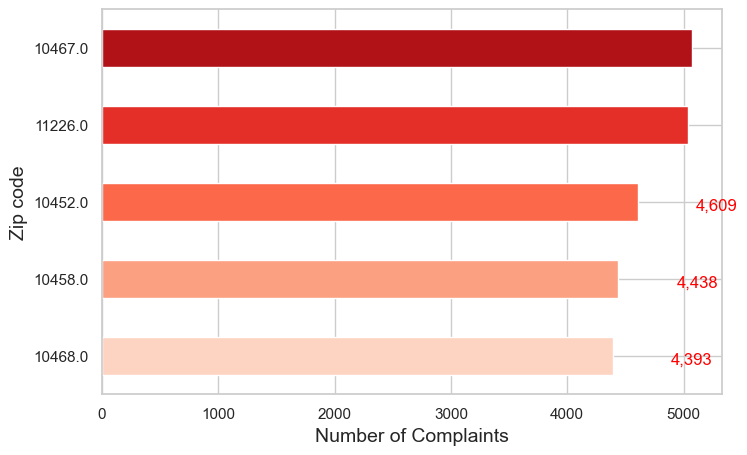

In [62]:
ny_zip = df2['incident_zip'].value_counts().head(5).sort_values()
ny_zip.index = ny_zip.index.map(str)
color = sns.color_palette('Reds', len(ny_zip))

ny_zip.plot(kind = 'barh', figsize = (8, 5), fontsize = 11, color = color)
plt.ylabel('Zip code', fontsize = 14)
plt.xlabel('Number of Complaints', fontsize = 14)

for index, value in enumerate(ny_zip):   
    label = str(format(int(value), ',')) 
    plt.annotate(label, xy = (value + 500, index - 0.1), color = 'red')

#### 10467 and 11226 are the zip codes with the highest number of complaints filed (10114). As we can see from the map but also from the code below

In [63]:
print('10467 Zip code belongs to: ', df[df['incident_zip'] == 10467.0].head().iloc[0]['borough'])

10467 Zip code belongs to:  BRONX


In [64]:
df2['incident_zip'].value_counts()

incident_zip
10467.0    5077
11226.0    5037
10452.0    4609
10458.0    4438
10468.0    4393
           ... 
10115.0       1
11371.0       1
10118.0       1
10803.0       1
11359.0       1
Name: count, Length: 214, dtype: int64

### The task description mentions using the 311 complaint data to predict the median household income, not that the data itself includes a household income column. Therefore I found a dataset containing the median household income for each zip code in New York City for year 2022  https://simplemaps.com/city/new-york/zips/income-household-median

#### data is dictionary containing  median householdincome mapped to each incident_zip

In [65]:
data = {10001: 101409,10002: 37093,10003: 137533,10004: 216017,10005: 197188,10006: 200536,10007: 250001,10009: 77551,10010: 131635,10011: 139343,10012: 117581,10013: 137572,10014: 136559,10016: 136431,10017: 136112,10018: 130457,10019: 105538,
    10021: 136060,10022: 156255,10023: 136109,10024: 153177,10025: 103440,10026: 65038,10027: 58435,10028: 149789,10029: 33901,10030: 42834,10031: 57180,10032: 55059,10033: 71630,10034: 6385,10035: 32555,10036: 98177,10037: 48782,10038: 99924,10039: 50164,10040: 54700,10044: 115294,10065: 152335,10069: 183178, 10075: 131372,10128: 127919,10162: 99300,10280: 178148,
    10282: 250001,10301: 78053,10302: 73927,10303: 69879,10304: 64539,10305: 76833,10306: 88687,10307: 117469,10308: 116082,10309: 107500,10310: 96161,
    10312: 100875,10314: 94578,10451: 33945,10452: 33877,10453: 34860,10454: 21846,10455: 30741,10456: 31166,10457: 38066,10458: 38768,
    10459: 36631,10460: 31504,10461: 61087,10462: 59032,10463: 63048,10464: 118972,10465: 80245,10466: 62918,10467: 42639,10468: 40138,10469: 70415,
    10470: 70107,10471: 96368,10472: 36730,10473: 48212,10474: 33157,10475: 56327,11001: 132344,11004: 100174,11005: 60800,11101: 98920,11102: 95478,
    11103: 82597,11104: 81142,11105: 93200,11106: 71972,11109: 160898,11201: 148282,11203: 61414,11204: 58850,11205: 68607,11206: 49013,11207: 45616,11208: 49679,11209: 84145,11210: 77378,
    11211: 89091,11212: 30733,11213: 48896,11214: 58487,11215: 156930,11216: 84661,11217: 133269,11218: 81857,11219: 44450,11220: 57046,11221: 66923,11222: 110385,11223: 57281,
    11224: 37241,11225: 68542,11226: 66173,11228: 77189,11229: 69076,11230: 61017,11231: 121638,11232: 77031,11233: 52380,11234: 86185,
    11235: 58669,11236: 73562,11237: 65908,11238: 114427,11239: 33736,11354: 52273,11355: 46963,11356: 73318,11357: 88580,11358: 74854,11360: 92851,
    11361: 93734,11362: 100528,11363: 98111,11364: 90970,11365: 73279,11366: 100781,11367: 71469,11368: 62254,11369: 66132,11370: 67241,
    11372: 62910,11373: 62072,11374: 79221,11375: 96321,11377: 66325,11378: 85464,11379: 88672,11385: 77350,11411: 108131,11412: 93429,
    11413: 104236,11414: 86113,11415: 80360,11416: 76477,11417: 78498,11418: 77708,11419: 84245,11420: 89027,11421: 76721,11422: 95945,
    11423: 69386,11426: 102818,11427: 84000,11428: 83417,11429: 89318,11432: 66246,11433: 68801,11434: 66546,11435: 71346,11436: 78306,11691: 54877,11692: 53498,11693: 64688,11694: 88643,11697: 113047
}

In [66]:
df2["householdincome"] = df2["incident_zip"].apply(lambda incident_zip: data.get(incident_zip))
df2["householdincome"] = df2["householdincome"].fillna(-11414)
df2

,unique_key,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,status,bbl,borough,latitude,longitude,created_Month,closed_Month,created_Year,closed_Year,created_Day,closed_Day,created_hours,closed_hours,created_minute,closed_minute,Request_Closing_Time,Request_Closing_seconds,Request_Closing_minutes,Request_Closing_hours,householdincome
0,56415040,NYPD,New York City Police Department,Illegal Fireworks,NaN,Street/Sidewalk,11218.0,BROOKLYN,Closed,3.053750e+09,BROOKLYN,40.638927,-73.973250,12,1,2022,2023,31,1,23,0,59,24,0 days 00:24:36,1476.0,0 days 00:00:24.600000,0.410000,81857.0
1,56418476,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033.0,NEW YORK,Closed,1.021650e+09,MANHATTAN,40.851187,-73.932670,12,1,2022,2023,31,1,23,0,59,26,0 days 00:27:38,1658.0,0 days 00:00:27.633333333,0.460556,71630.0
2,56415364,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11226.0,BROOKLYN,Closed,3.051230e+09,BROOKLYN,40.645124,-73.960077,12,1,2022,2023,31,1,23,1,59,0,0 days 01:01:06,3666.0,0 days 00:01:01.100000,1.018333,66173.0
3,56414786,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,3+ Family Apt. Building,10035.0,NEW YORK,Closed,1.017970e+09,MANHATTAN,40.801435,-73.934432,12,1,2022,2023,31,3,23,7,59,49,2 days 07:50:52,201052.0,0 days 00:55:50.866666666,55.847778,32555.0
4,56414075,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11385.0,RIDGEWOOD,Closed,4.035470e+09,QUEENS,40.699215,-73.906590,12,1,2022,2023,31,1,23,0,58,29,0 days 00:30:51,1851.0,0 days 00:00:30.850000,0.514167,77350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245750,56084639,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11372.0,JACKSON HEIGHTS,Closed,4.014600e+09,QUEENS,40.751844,-73.880891,11,11,2022,2022,25,26,22,0,31,40,0 days 02:08:21,7701.0,0 days 00:02:08.350000,2.139167,62910.0
245751,56087807,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11203.0,BROOKLYN,Closed,3.046600e+09,BROOKLYN,40.654544,-73.926763,11,11,2022,2022,25,25,22,22,31,55,0 days 00:23:15,1395.0,0 days 00:00:23.250000,0.387500,61414.0
245752,56084623,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10463.0,BRONX,Closed,2.059180e+09,BRONX,40.888337,-73.913486,11,11,2022,2022,25,25,22,23,31,14,0 days 00:43:04,2584.0,0 days 00:00:43.066666666,0.717778,63048.0
245753,56084378,NYPD,New York City Police Department,Encampment,NaN,Store/Commercial,11354.0,FLUSHING,Closed,4.049800e+09,QUEENS,40.760168,-73.830423,11,11,2022,2022,25,25,22,22,31,50,0 days 00:18:57,1137.0,0 days 00:00:18.950000,0.315833,52273.0


In [67]:
df2['incident_zip'].value_counts()

incident_zip
10467.0    5077
11226.0    5037
10452.0    4609
10458.0    4438
10468.0    4393
           ... 
10115.0       1
11371.0       1
10118.0       1
10803.0       1
11359.0       1
Name: count, Length: 214, dtype: int64

### The task description mentions using the 311 complaint data to predict the median population, not that the data itself includes a population column. Therefore I found a dataset containing the median population for each zip code in New York City for year 2022 https://www.newyork-demographics.com/zip_codes_by_population

In [68]:
PopulationPerZipCode = {
    10001: 27004.00,10002: 76518.00,10003: 53877.00,10004: 4579.00,10005: 8801.00,10006: 3736.00,10007: 7506.00,10009: 58418.00,10010: 32410.00,
    10011: 50772.00,10012: 21216.00,10013: 29453.00,10014: 29461.00,10016: 54369.00,10017: 14486.00,10018: 8659.00,10019: 42766.00,
   10021: 40642.00,10022: 33586.00,10023: 65706.00,10024: 62774.00,10025: 96988.00,10026: 38265.00,10027: 65806.00,10028: 45717.00,
    10029: 75614.00,10030: 31268.00,10031: 61044.00,10032: 60480.00,10033: 58711.00,10034: 41570.00,10035: 38595.00,10036: 30930.00,
    10037: 19138.00,10038: 23343.00,10039: 29887.00,10040: 43653.00,10044: 11846.00,10065: 30859.00,10069: 6259.00,10075: 23920.00,
    10128: 56695.00,10162: 1523.00,10279: 161.00,10280: 8843.00,10282: 6450.00,10301: 40331.00,10302: 18567.00,10303: 27083.00,10304: 44864.00,
    10305: 42211.00,10306: 56232.00,10307: 14755.00,10308: 30075.00,10309: 34740.00,10310: 26239.00,10312: 63473.00,10314: 94355.00,
    10451: 51311.00,10452: 78624.00,10453: 80385.00,10454: 41073.00,10455: 44380.00,10456: 88575.00,10457: 79817.00,10458: 82678.00,
    10459: 51964.00,10460: 59852.00,10461: 50868.00,10462: 77230.00,10463: 70245.00,10464: 8005.00,10465: 29582.00,10466: 64447.00,
    10467: 82837.00,10468: 93176.00,10469: 91831.00,10470: 20358.00,10471: 45532.00,10472: 69129.00,10473: 76966.00,10474: 19779.00,10475: 37445.00,
    11001: 10803.00,11004: 17349.00,11040: 36842.00,11101: 37904.00,11102: 37669.00,11103: 54856.00,11104: 50846.00,11105: 55083.00,
    11106: 63592.00,11109: 4008.00,11201: 69162.00,11203: 119234.00,11204: 98682.00,11205: 74905.00,11206: 118931.00,11207: 141587.00,11208: 149474.00,11209: 144156.00,
    11210: 132667.00,11211: 194905.00,11212: 132740.00,11213: 166225.00,11214: 111515.00,11215: 137688.00,11216: 137986.00,11217: 120734.00,
    11218: 132714.00,11219: 155692.00,11220: 171270.00,11221: 143786.00,11222: 133751.00,11223: 119246.00,11224: 66224.00,11225: 121631.00,11226: 155232.00,
    11228: 138613.00,11229: 135452.00,11230: 158235.00,11231: 106486.00,11232: 119449.00,11233: 141293.00,11234: 179776.00,11235: 112825.00,
    11236: 138013.00,11237: 134869.00,11238: 135718.00,11239: 60547.00,11249: 12668.00,11251: 11791.00,11354: 103559.00,11355: 120835.00,11356: 74073.00,
    11357: 69779.00,11358: 125902.00,11360: 47742.00,11361: 100869.00,11362: 51999.00,11364: 86149.00,11365: 94105.00,11366: 85866.00,11367: 90327.00,11368: 130651.00,11369: 113232.00,11370: 107470.00,11372: 144038.00,
    11373: 124540.00,11374: 105625.00,11375: 159619.00,11377: 181270.00,11378: 89177.00,11379: 112052.00,11385: 196139.00,11411: 41741.00,11412: 99463.00,
    11413: 114066.00,11414: 90326.00,11415: 58702.00,11416: 63195.00,11417: 75345.00,11418: 106578.00,11419: 137073.00,11420: 121637.00,11421: 106875.00,11422: 75482.00,
    11423: 81642.00,11426: 52960.00,11427: 58054.00,11428: 65467.00,11429: 78231.00,11432: 159545.00,11433: 153431.00,11434: 207394.00,11435: 140964.00,
    11436: 61187.00,11691: 111978.00,11692: 53591.00,11693: 55778.00,11694: 68515.00,11695: 20689.00,
   
}

In [69]:
df2["population"] = df2["incident_zip"].apply(lambda incident_zip: PopulationPerZipCode.get(incident_zip))
df2["population"] = df2["population"].fillna(-11414)
df2

,unique_key,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,status,bbl,borough,latitude,longitude,created_Month,closed_Month,created_Year,closed_Year,created_Day,closed_Day,created_hours,closed_hours,created_minute,closed_minute,Request_Closing_Time,Request_Closing_seconds,Request_Closing_minutes,Request_Closing_hours,householdincome,population
0,56415040,NYPD,New York City Police Department,Illegal Fireworks,NaN,Street/Sidewalk,11218.0,BROOKLYN,Closed,3.053750e+09,BROOKLYN,40.638927,-73.973250,12,1,2022,2023,31,1,23,0,59,24,0 days 00:24:36,1476.0,0 days 00:00:24.600000,0.410000,81857.0,132714.0
1,56418476,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033.0,NEW YORK,Closed,1.021650e+09,MANHATTAN,40.851187,-73.932670,12,1,2022,2023,31,1,23,0,59,26,0 days 00:27:38,1658.0,0 days 00:00:27.633333333,0.460556,71630.0,58711.0
2,56415364,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11226.0,BROOKLYN,Closed,3.051230e+09,BROOKLYN,40.645124,-73.960077,12,1,2022,2023,31,1,23,1,59,0,0 days 01:01:06,3666.0,0 days 00:01:01.100000,1.018333,66173.0,155232.0
3,56414786,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,3+ Family Apt. Building,10035.0,NEW YORK,Closed,1.017970e+09,MANHATTAN,40.801435,-73.934432,12,1,2022,2023,31,3,23,7,59,49,2 days 07:50:52,201052.0,0 days 00:55:50.866666666,55.847778,32555.0,38595.0
4,56414075,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11385.0,RIDGEWOOD,Closed,4.035470e+09,QUEENS,40.699215,-73.906590,12,1,2022,2023,31,1,23,0,58,29,0 days 00:30:51,1851.0,0 days 00:00:30.850000,0.514167,77350.0,196139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245750,56084639,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11372.0,JACKSON HEIGHTS,Closed,4.014600e+09,QUEENS,40.751844,-73.880891,11,11,2022,2022,25,26,22,0,31,40,0 days 02:08:21,7701.0,0 days 00:02:08.350000,2.139167,62910.0,144038.0
245751,56087807,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11203.0,BROOKLYN,Closed,3.046600e+09,BROOKLYN,40.654544,-73.926763,11,11,2022,2022,25,25,22,22,31,55,0 days 00:23:15,1395.0,0 days 00:00:23.250000,0.387500,61414.0,119234.0
245752,56084623,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10463.0,BRONX,Closed,2.059180e+09,BRONX,40.888337,-73.913486,11,11,2022,2022,25,25,22,23,31,14,0 days 00:43:04,2584.0,0 days 00:00:43.066666666,0.717778,63048.0,70245.0
245753,56084378,NYPD,New York City Police Department,Encampment,NaN,Store/Commercial,11354.0,FLUSHING,Closed,4.049800e+09,QUEENS,40.760168,-73.830423,11,11,2022,2022,25,25,22,22,31,50,0 days 00:18:57,1137.0,0 days 00:00:18.950000,0.315833,52273.0,103559.0


#### The numbers in the per_capita_complaint_rate dictionary represent the normalized complaint rates for each zip code in New York City. Here's what they mean:

- Each key in the dictionary represents a zip code in New York City.
- The corresponding value for each zip code is the complaint rate, normalized by the population of that zip code.
- The complaint rate is calculated by dividing the total number of complaints in a zip code by the population of that zip code.
- For example, if a zip code has a complaint rate of 0.05, it means that, on average, there are 5 complaints per 100 residents    in that zip code.
- A higher complaint rate indicates a higher frequency of complaints relative to the population size, while a lower complaint      rate indicates a lower frequency of complaints relative to the population size.
- Some zip codes may have a complaint rate of 0, indicating that there were no complaints reported in that area or that the       population size is very large compared to the number of complaints.
- In summary, the per capita complaint rate provides a way to compare the frequency of complaints across different zip codes     while accounting for differences in population size.

#### The per capita complaint rate provides insight into the relative size of neighborhoods in terms of their complaint activity. Here's how it can inform us about the size of the neighborhood:

- Higher Complaint Rate: A higher per capita complaint rate suggests that, relative to its population size, the neighborhood      experiences a higher frequency of complaints. This could indicate either a higher density of residents reporting issues or a    higher incidence of problems in the area.

- Lower Complaint Rate: Conversely, a lower per capita complaint rate indicates that, relative to its population size, the       neighborhood experiences fewer complaints. This might suggest either a lower density of residents reporting issues or a         relatively well-maintained and problem-free area.

- Zero Complaint Rate: A complaint rate of zero could indicate several possibilities:

- There were no complaints reported in the area.
- The population size is significantly larger compared to the number of complaints, making the rate effectively zero.
- Data limitations or reporting issues may be present.
- Overall, the per capita complaint rate helps to contextualize the complaint data by adjusting for differences in population size across neighborhoods. It allows for a fairer comparison of complaint activity between neighborhoods of varying population densities.

In [70]:
complaints_per_zip = df2.groupby('incident_zip').size()
per_capita_complaint_rate = {}
for incident_zip, complaint_count in complaints_per_zip.items():
    population = PopulationPerZipCode.get(incident_zip, 1)  # Default to 1 if population data is missing
    per_capita_complaint_rate[incident_zip] = complaint_count / population

In [71]:
per_capita_complaint_rate

{10000.0: 19.0,
 10001.0: 0.034031995259961485,
 10002.0: 0.02660811835123762,
 10003.0: 0.026449134138871875,
 10004.0: 0.022493994321904347,
 10005.0: 0.010680604476764005,
 10006.0: 0.024089935760171308,
 10007.0: 0.026378896882494004,
 10009.0: 0.024889588825362047,
 10010.0: 0.014594261030546127,
 10011.0: 0.03354210982431261,
 10012.0: 0.034973604826546004,
 10013.0: 0.025124775065358367,
 10014.0: 0.02440514578595431,
 10016.0: 0.020931045264764848,
 10017.0: 0.025956095540521883,
 10018.0: 0.05162258921353505,
 10019.0: 0.05195716223167937,
 10020.0: 26.0,
 10021.0: 0.013705034201072781,
 10022.0: 0.017120228666706365,
 10023.0: 0.022281070221897542,
 10024.0: 0.01949851849491828,
 10025.0: 0.025333030890419432,
 10026.0: 0.0447406245916634,
 10027.0: 0.03408503783849497,
 10028.0: 0.014546011330577247,
 10029.0: 0.02339513846642156,
 10030.0: 0.0619802993475758,
 10031.0: 0.05109429264137343,
 10032.0: 0.04904100529100529,
 10033.0: 0.03827221474681065,
 10034.0: 0.04777483762

In [72]:
df2["per_capita_complaint_rate"] = df2["incident_zip"].apply(lambda incident_zip: per_capita_complaint_rate.get(incident_zip))
df2["per_capita_complaint_rate"] = df2["per_capita_complaint_rate"].fillna(-11414)
df2

,unique_key,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,status,bbl,borough,latitude,longitude,created_Month,closed_Month,created_Year,closed_Year,created_Day,closed_Day,created_hours,closed_hours,created_minute,closed_minute,Request_Closing_Time,Request_Closing_seconds,Request_Closing_minutes,Request_Closing_hours,householdincome,population,per_capita_complaint_rate
0,56415040,NYPD,New York City Police Department,Illegal Fireworks,NaN,Street/Sidewalk,11218.0,BROOKLYN,Closed,3.053750e+09,BROOKLYN,40.638927,-73.973250,12,1,2022,2023,31,1,23,0,59,24,0 days 00:24:36,1476.0,0 days 00:00:24.600000,0.410000,81857.0,132714.0,0.016351
1,56418476,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033.0,NEW YORK,Closed,1.021650e+09,MANHATTAN,40.851187,-73.932670,12,1,2022,2023,31,1,23,0,59,26,0 days 00:27:38,1658.0,0 days 00:00:27.633333333,0.460556,71630.0,58711.0,0.038272
2,56415364,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11226.0,BROOKLYN,Closed,3.051230e+09,BROOKLYN,40.645124,-73.960077,12,1,2022,2023,31,1,23,1,59,0,0 days 01:01:06,3666.0,0 days 00:01:01.100000,1.018333,66173.0,155232.0,0.032448
3,56414786,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,3+ Family Apt. Building,10035.0,NEW YORK,Closed,1.017970e+09,MANHATTAN,40.801435,-73.934432,12,1,2022,2023,31,3,23,7,59,49,2 days 07:50:52,201052.0,0 days 00:55:50.866666666,55.847778,32555.0,38595.0,0.041923
4,56414075,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11385.0,RIDGEWOOD,Closed,4.035470e+09,QUEENS,40.699215,-73.906590,12,1,2022,2023,31,1,23,0,58,29,0 days 00:30:51,1851.0,0 days 00:00:30.850000,0.514167,77350.0,196139.0,0.016764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245750,56084639,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11372.0,JACKSON HEIGHTS,Closed,4.014600e+09,QUEENS,40.751844,-73.880891,11,11,2022,2022,25,26,22,0,31,40,0 days 02:08:21,7701.0,0 days 00:02:08.350000,2.139167,62910.0,144038.0,0.012045
245751,56087807,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11203.0,BROOKLYN,Closed,3.046600e+09,BROOKLYN,40.654544,-73.926763,11,11,2022,2022,25,25,22,22,31,55,0 days 00:23:15,1395.0,0 days 00:00:23.250000,0.387500,61414.0,119234.0,0.021764
245752,56084623,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10463.0,BRONX,Closed,2.059180e+09,BRONX,40.888337,-73.913486,11,11,2022,2022,25,25,22,23,31,14,0 days 00:43:04,2584.0,0 days 00:00:43.066666666,0.717778,63048.0,70245.0,0.034494
245753,56084378,NYPD,New York City Police Department,Encampment,NaN,Store/Commercial,11354.0,FLUSHING,Closed,4.049800e+09,QUEENS,40.760168,-73.830423,11,11,2022,2022,25,25,22,22,31,50,0 days 00:18:57,1137.0,0 days 00:00:18.950000,0.315833,52273.0,103559.0,0.008131


# Removing Outliers

#### This code provides a basic method for outlier detection and removal based on the IQR method. You can adapt it to identify outliers in other columns of your DataFrame by modifying the outlier_columns list. Remember to analyze the context of your data and choose outlier detection techniques that suit your specific requirements.

22592 outliers detected in column householdincome


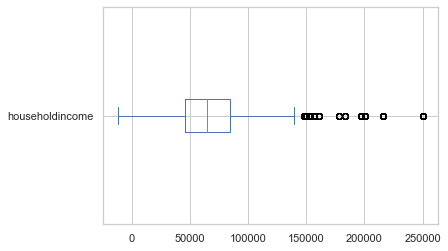

In [1357]:
outlier_columns = ["householdincome"]

for column in outlier_columns:
    lower_quartile = df2[column].quantile(0.25)
    upper_quartile = df2[column].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr *1 #factor to fine tune
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    
    outliers = df2[(df2[column]< min_border) | (df2[column] > max_border)].index
    df2['householdincome'].plot(kind='box' , vert=False)
    print(f"{len(outliers)} outliers detected in column {column}")
    df2.drop(outliers,inplace = True)

In [1358]:
categorical_train = df2.select_dtypes(exclude = ['int64','float','int32'])
numerical_train = df2.select_dtypes(include = ['int64','float','int32'])

numerical_train.columns

Index(['unique_key', 'incident_zip', 'bbl', 'latitude', 'longitude',
       'created_Month', 'closed_Month', 'created_Year', 'closed_Year',
       'created_Day', 'closed_Day', 'created_hours', 'closed_hours',
       'created_minute', 'closed_minute', 'Request_Closing_seconds',
       'Request_Closing_hours', 'householdincome', 'population',
       'per_capita_complaint_rate'],
      dtype='object')

In [1359]:
categorical_train.columns

Index(['agency', 'agency_name', 'complaint_type', 'descriptor',
       'location_type', 'city', 'status', 'borough', 'Request_Closing_Time',
       'Request_Closing_minutes'],
      dtype='object')

In [1360]:
dfnew = df2.copy()

In [1361]:
dfr.columns

Index(['incident_zip', 'householdincome', 'per_capita_complaint_rate',
       'agency_0', 'agency_1', 'agency_2', 'agency_3', 'agency_name_0',
       'agency_name_1', 'agency_name_2', 'agency_name_3', 'complaint_type_0',
       'complaint_type_1', 'complaint_type_2', 'complaint_type_3',
       'complaint_type_4', 'complaint_type_5', 'complaint_type_6',
       'descriptor_0', 'descriptor_1', 'descriptor_2', 'descriptor_3',
       'descriptor_4', 'descriptor_5', 'descriptor_6', 'descriptor_7',
       'descriptor_8', 'location_type_0', 'location_type_1', 'location_type_2',
       'location_type_3', 'location_type_4', 'location_type_5',
       'location_type_6', 'city_0', 'city_1', 'city_2', 'city_3', 'city_4',
       'city_5', 'status_0', 'status_1', 'status_2', 'borough_0', 'borough_1',
       'borough_2'],
      dtype='object')

#### this code snippet performs feature engineering by converting categorical features into a one-hot encoded representation using a BinaryEncoder and then dropping the original categorical features (potentially along with other features) from the DataFrame.

In [1362]:
##Binary Encoding 

be = BinaryEncoder()
newdata = be.fit_transform(dfnew[['agency', 'agency_name', 'complaint_type', 'descriptor',
       'location_type', 'city', 'status', 'borough'
       ]])
dfr = pd.concat([dfnew.reset_index(drop=True),newdata.reset_index(drop=True)],axis =1)

dfr.drop(columns = ['agency', 'agency_name', 'complaint_type', 'descriptor',
       'location_type', 'city', 'status', 'borough',
      'unique_key','bbl', 'latitude', 'longitude',
       'created_Month', 'closed_Month', 'created_Year', 'closed_Year',
       'created_Day', 'closed_Day', 'created_hours', 'closed_hours',
       'created_minute', 'closed_minute', 'Request_Closing_Time',
       'Request_Closing_seconds', 'Request_Closing_minutes',
       'Request_Closing_hours','population' ],axis =1,inplace =True)
xf = dfr.copy()
dfr.columns

Index(['incident_zip', 'householdincome', 'per_capita_complaint_rate',
       'agency_0', 'agency_1', 'agency_2', 'agency_3', 'agency_name_0',
       'agency_name_1', 'agency_name_2', 'agency_name_3', 'complaint_type_0',
       'complaint_type_1', 'complaint_type_2', 'complaint_type_3',
       'complaint_type_4', 'complaint_type_5', 'complaint_type_6',
       'descriptor_0', 'descriptor_1', 'descriptor_2', 'descriptor_3',
       'descriptor_4', 'descriptor_5', 'descriptor_6', 'descriptor_7',
       'descriptor_8', 'location_type_0', 'location_type_1', 'location_type_2',
       'location_type_3', 'location_type_4', 'location_type_5',
       'location_type_6', 'city_0', 'city_1', 'city_2', 'city_3', 'city_4',
       'city_5', 'status_0', 'status_1', 'status_2', 'borough_0', 'borough_1',
       'borough_2'],
      dtype='object')

####  this code snippet calculates the feature importances for your Random Forest model, creates a DataFrame to organize the results, sorts the features by importance, and visualizes them using a bar chart. This can help you understand which features are most influential in the model's predictions and potentially guide further feature selection or model interpretability efforts.

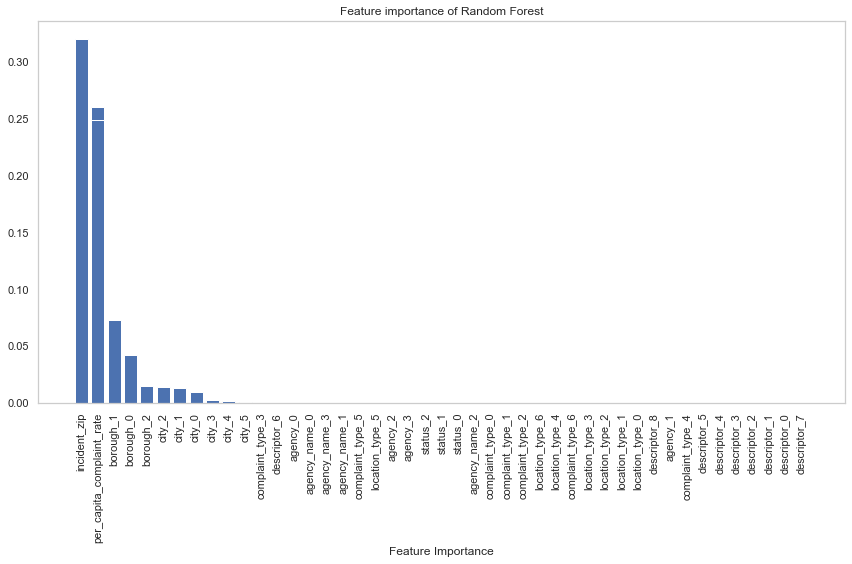

In [1363]:
# Feature Importance

feature_importance = pd.DataFrame(regressor.feature_importances_)
feature_names = list(X_train.columns)  # Extract column names as a list

feature_importance_summary = pd.concat([pd.DataFrame(feature_names), feature_importance], axis=1)
feature_importance_summary.columns = ["input_variable", "feature_importance"]

feature_importance_summary.sort_values(by="feature_importance", ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
plt.bar(feature_importance_summary["input_variable"], feature_importance_summary["feature_importance"])
plt.title("Feature importance of Random Forest")
plt.xlabel("Feature Importance")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(False)
plt.show()

In [1364]:
# ... (rest of your code for feature selection and data preparation)
#xf.drop(columns = ['householdincome'],axis =1,inplace =True)

## Feature selection (assuming 'complaint_type' columns contain category information)
#complaint_category_cols = [col for col in xf.columns]# if col.startswith('complaint_type_')]
#features = complaint_category_cols + ['per_capita_complaint_rate']  # Add per capita rate if calculated

# Target variable
#target = 'householdincome'


# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(dfr[features], dfr[target], test_size=0.2, random_state=42)

# Define and train Gradient Boosting Regressor model
#model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=150, max_depth=4, random_state=42)
#model.fit(X_train, y_train)

# Evaluate model performance on test set
#y_pred = model.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

#print(f"Gradient Boosting MSE: {mse:.2f}")
#print(f"Gradient Boosting R-squared: {r2:.2f}")


Gradient Boosting MSE: 5123446.53
Gradient Boosting R-squared: 0.99


#### this code effectively uses GridSearchCV to explore different hyperparameter combinations for your Random Forest Regressor model, evaluating their performance using cross-validation. It then provides a clear summary of the results, including the best performing configuration and its corresponding metrics.

In [1278]:
SelectedModel = RandomForestRegressor(random_state=33)
SelectedParameters = {'n_estimators':[100,200,500,1000],'max_depth':[2,4,8,10]}



GridSearchModel = GridSearchCV(SelectedModel,SelectedParameters,
                               cv = 2,return_train_score=True)
GridSearchModel.fit(X_train, y_train)
sorted(GridSearchModel.cv_results_.keys())
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[
    ['mean_test_score','std_test_score','params','rank_test_score','mean_fit_time']]

# Showing Results
print('All Results are :\n', GridSearchResults )
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)

All Results are :
     mean_test_score  std_test_score                                   params  \
0          0.386387        0.000579    {'max_depth': 2, 'n_estimators': 100}   
1          0.386707        0.000897    {'max_depth': 2, 'n_estimators': 200}   
2          0.386719        0.000869    {'max_depth': 2, 'n_estimators': 500}   
3          0.386769        0.000905   {'max_depth': 2, 'n_estimators': 1000}   
4          0.617713        0.000709    {'max_depth': 4, 'n_estimators': 100}   
5          0.618467        0.001936    {'max_depth': 4, 'n_estimators': 200}   
6          0.618295        0.001868    {'max_depth': 4, 'n_estimators': 500}   
7          0.618623        0.001765   {'max_depth': 4, 'n_estimators': 1000}   
8          0.876560        0.012713    {'max_depth': 8, 'n_estimators': 100}   
9          0.878434        0.011220    {'max_depth': 8, 'n_estimators': 200}   
10         0.878972        0.013190    {'max_depth': 8, 'n_estimators': 500}   
11         0.878344  

#### this code snippet demonstrates how to train and evaluate a Random Forest Regression model using scikit-learn. It highlights the importance of splitting data into training and testing sets for unbiased evaluation.




In [1365]:
X_train, X_test, y_train, y_test = train_test_split(dfr[features], dfr[target], test_size=0.2, random_state=42)

# Define and train Random Forest model
regressor = RandomForestRegressor(n_estimators=500, random_state=33, n_jobs=-1, min_samples_leaf=2, max_depth=10)
regressor.fit(X_train, y_train)

# Evaluate model performance on test set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Calculate R-squared score

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R-squared: {r2:.2f}") 


Random Forest MSE: 27011492.06
Random Forest R-squared: 0.94
